In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
df = pd.read_csv( '/content/regression_data.csv', names=columns)

# **Preprocessing**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## drop columns ['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
* it including lots of null valus

In [32]:
df.drop(columns=['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [35]:
for col in df.columns:
  print(f"----------{col}----------")
  print('null = ', df[col].isnull().sum())
  print('unique values = ', df[col].unique())
  print('num of unique = ', df[col].nunique())

num_count = ['MSSubClass','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','GarageYrBlt','OpenPorchSF','EnclosedPorch',
             '3SsnPorch','ScreenPorch','MiscVal','MiscVal']
num_cat =   ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','PoolArea','MoSold','YrSold']

----------MSSubClass----------
null =  0
unique values =  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
num of unique =  15
----------MSZoning----------
null =  0
unique values =  ['RL' 'RM' 'C (all)' 'FV' 'RH']
num of unique =  5
----------LotFrontage----------
null =  259
unique values =  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
num of unique =  110
----------LotArea----------
null =  0
unique values =  [ 8450  9600 11250 ... 17217 13175  9717]
num of uni

# Split data to:

*   **Numerical_Count_Cols**
*   **Numerical_Categorical_Cols**
*   **Categorical_Cols**



In [36]:
numerical_count = ['MSSubClass','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','GarageYrBlt','OpenPorchSF','EnclosedPorch',
             '3SsnPorch','ScreenPorch','MiscVal','MiscVal']
numerical_cate =  ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','PoolArea','MoSold','YrSold']
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

## **Numerical_Countious_Columns**

In [37]:
df[numerical_count].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

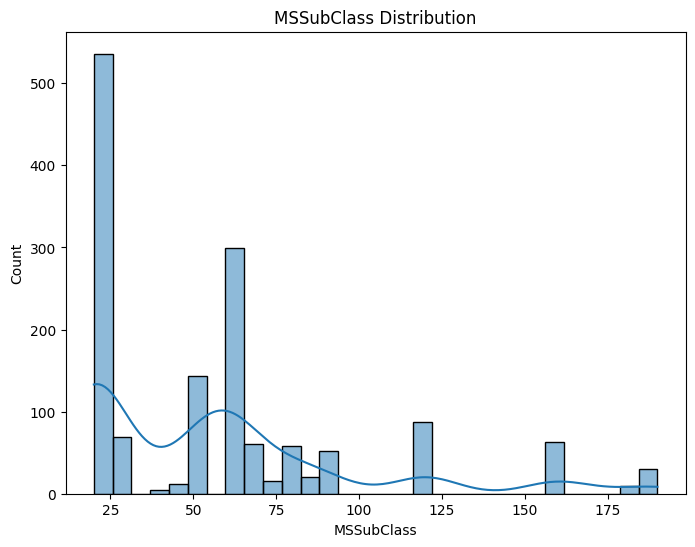

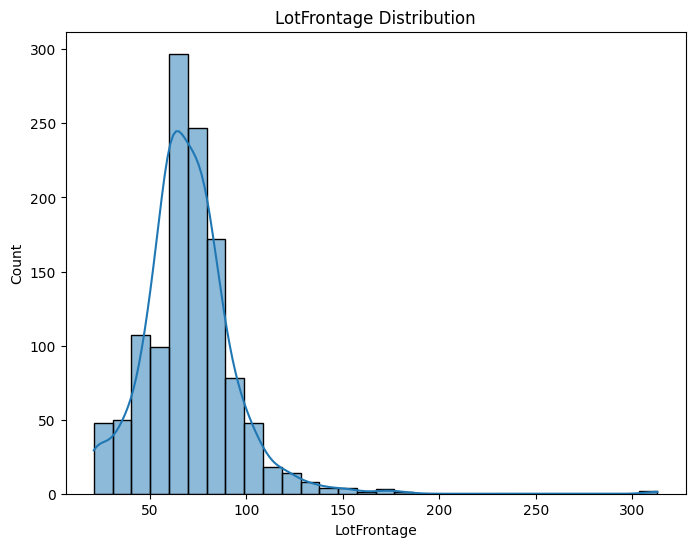

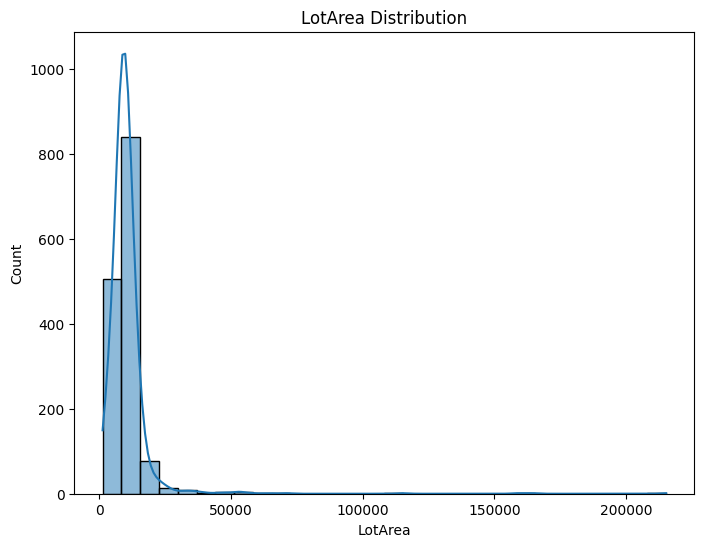

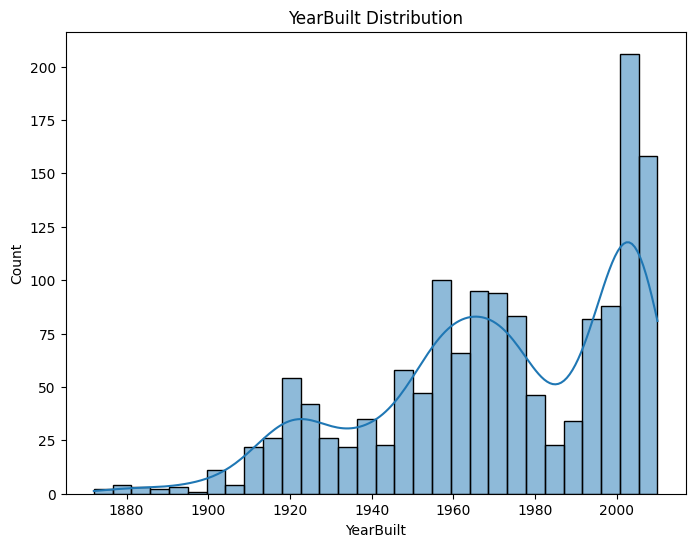

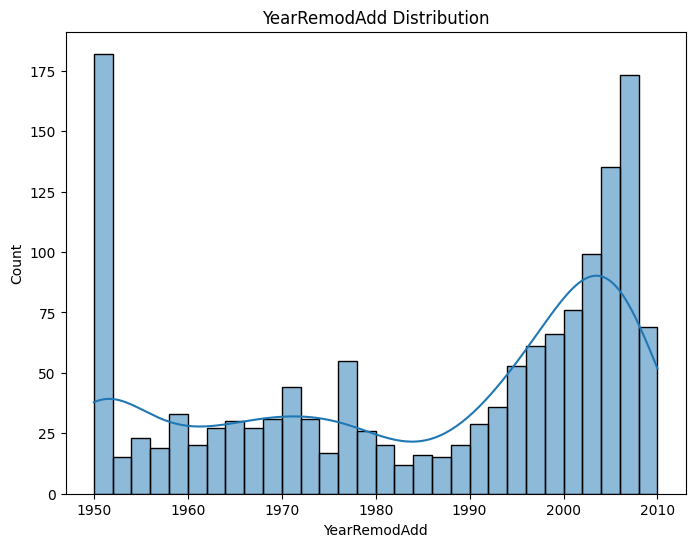

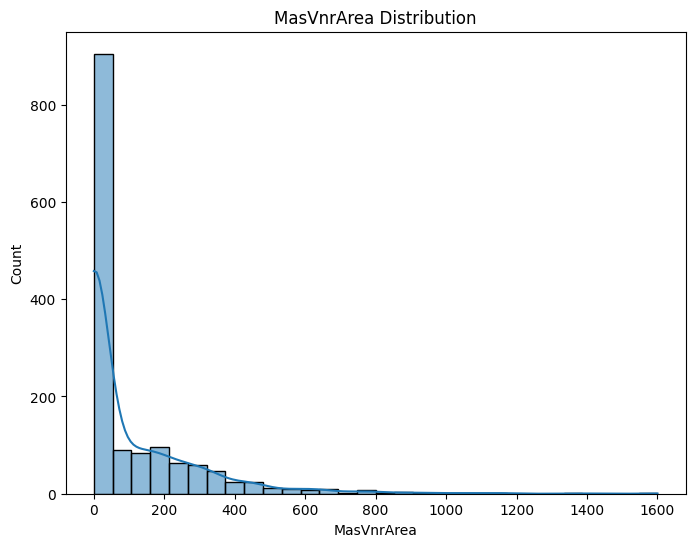

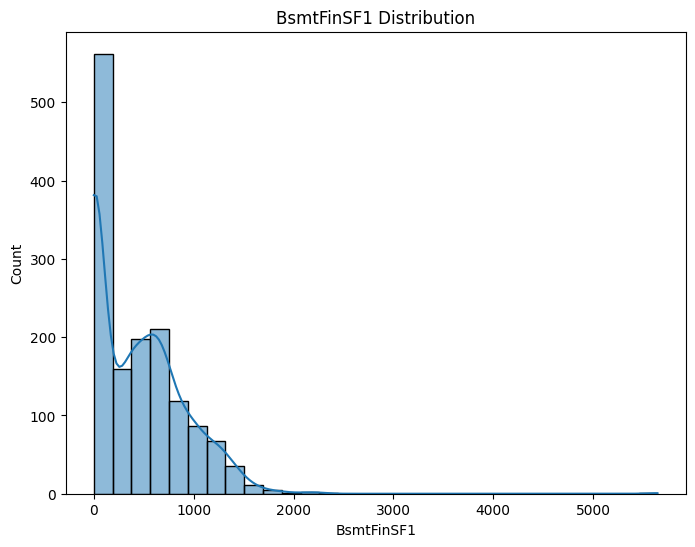

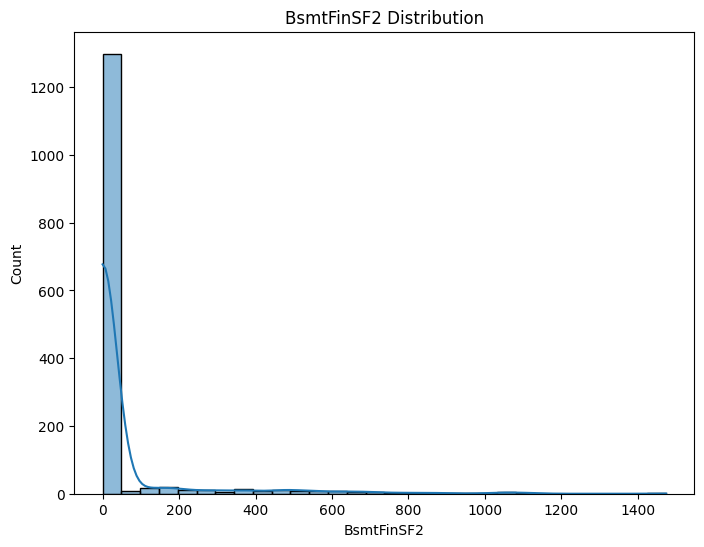

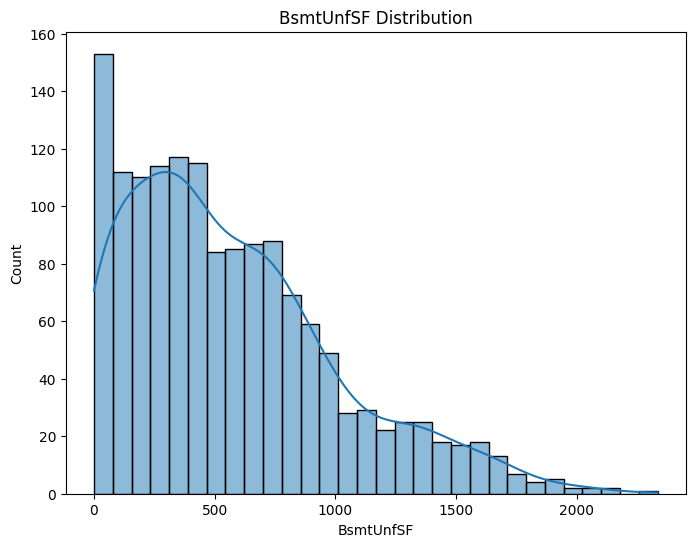

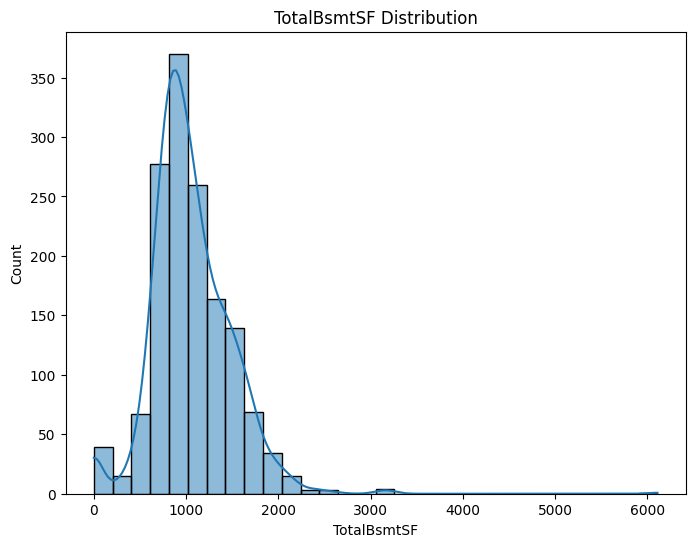

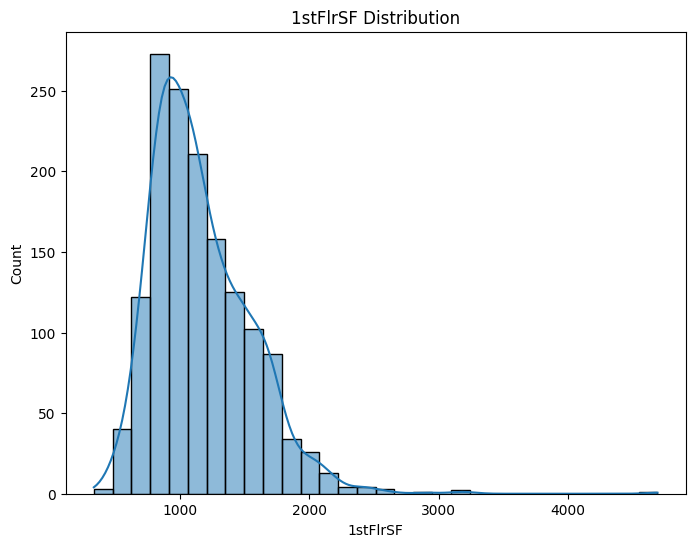

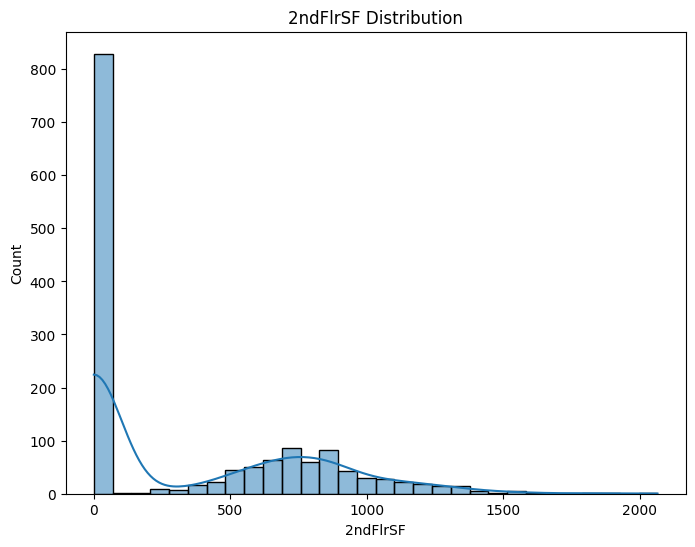

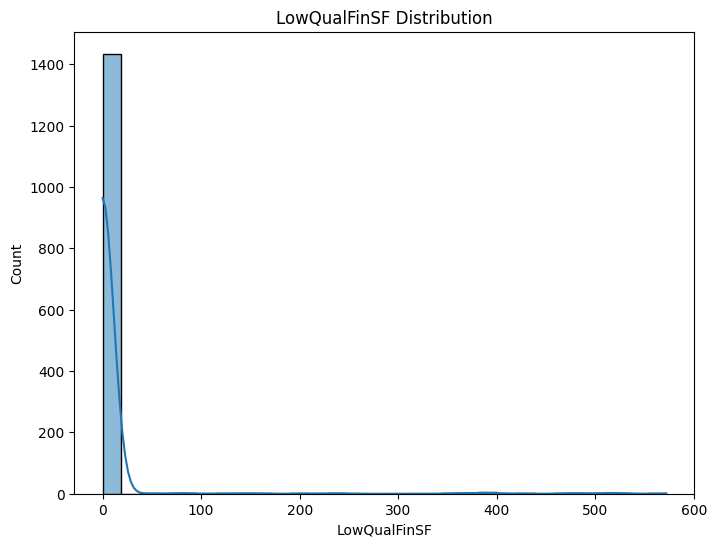

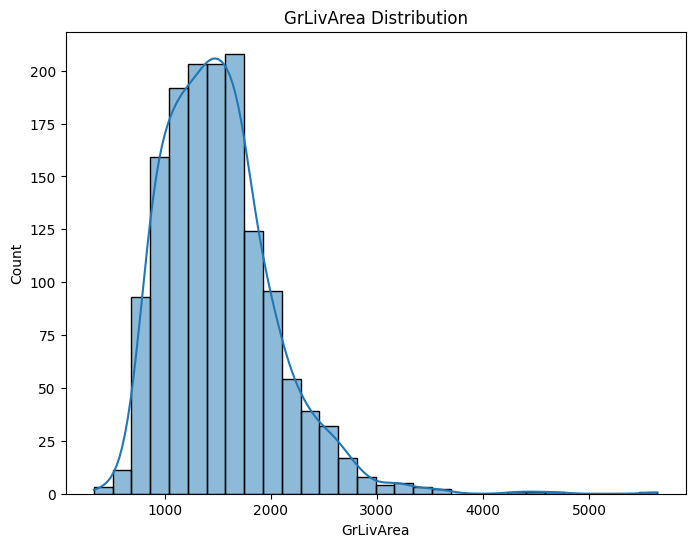

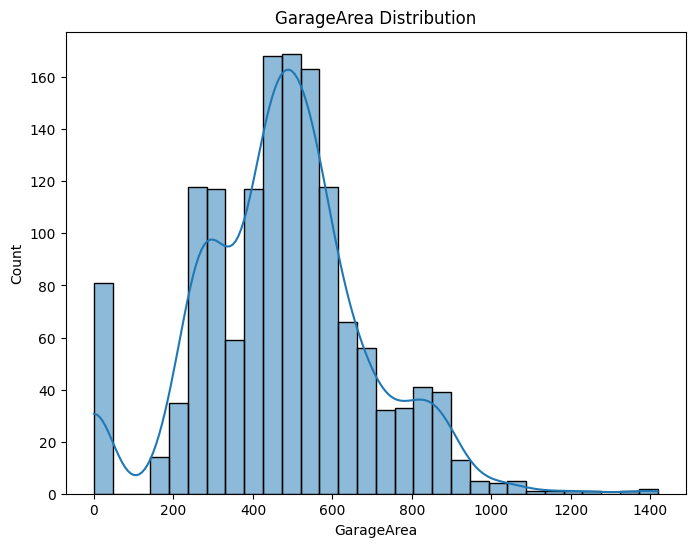

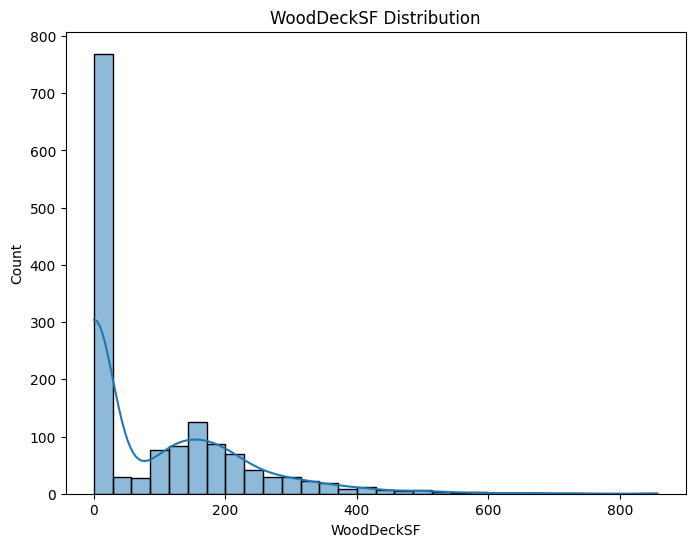

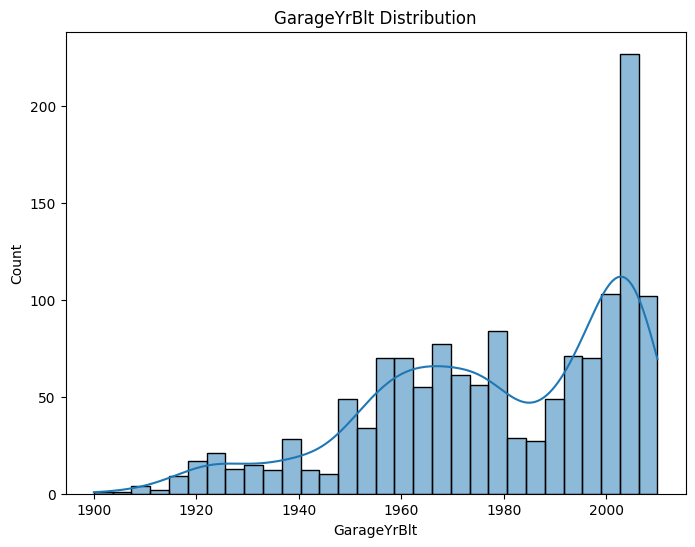

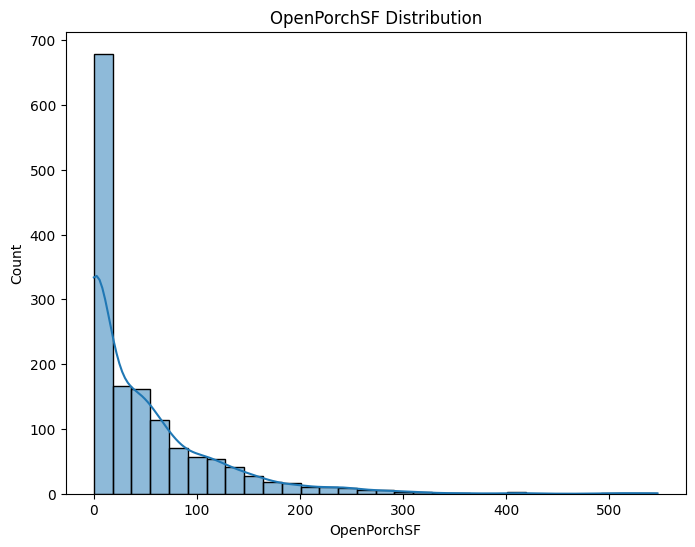

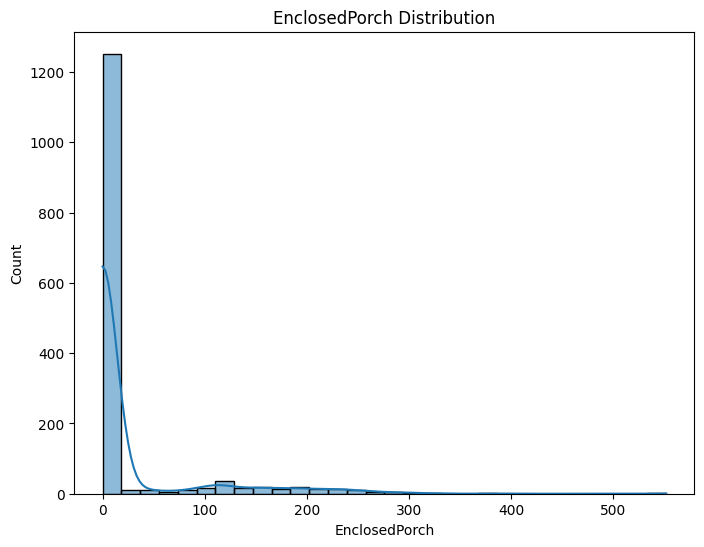

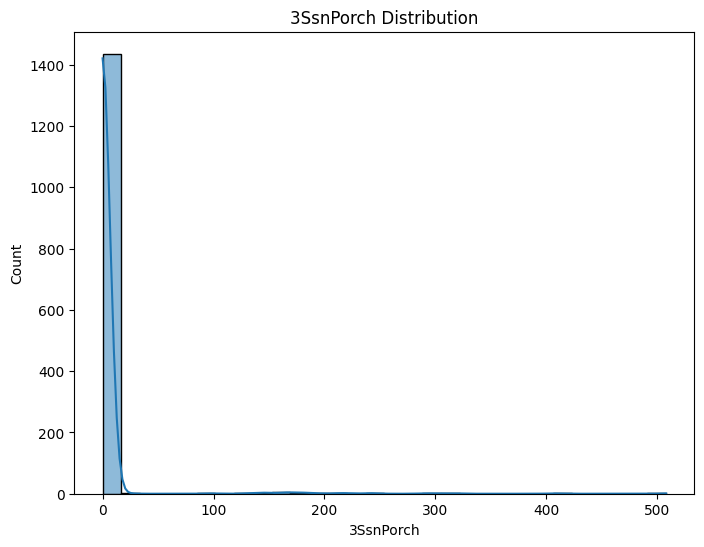

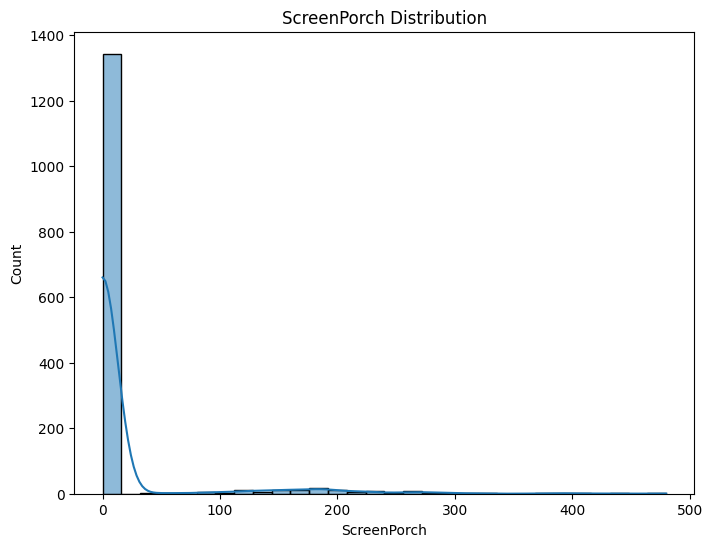

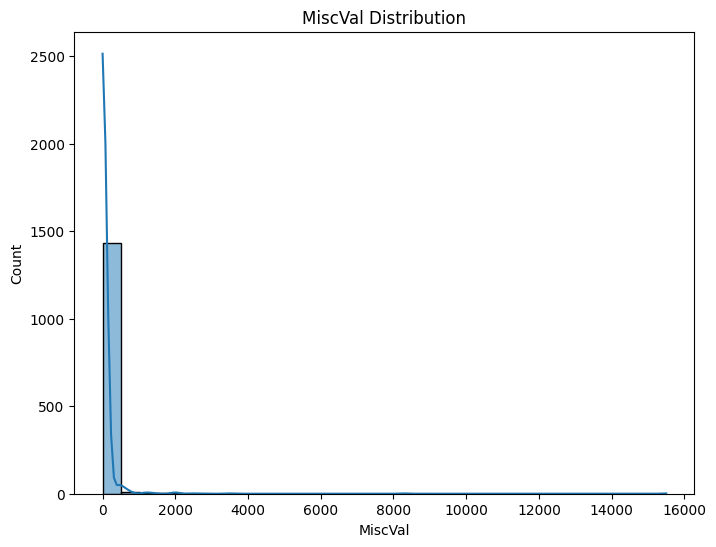

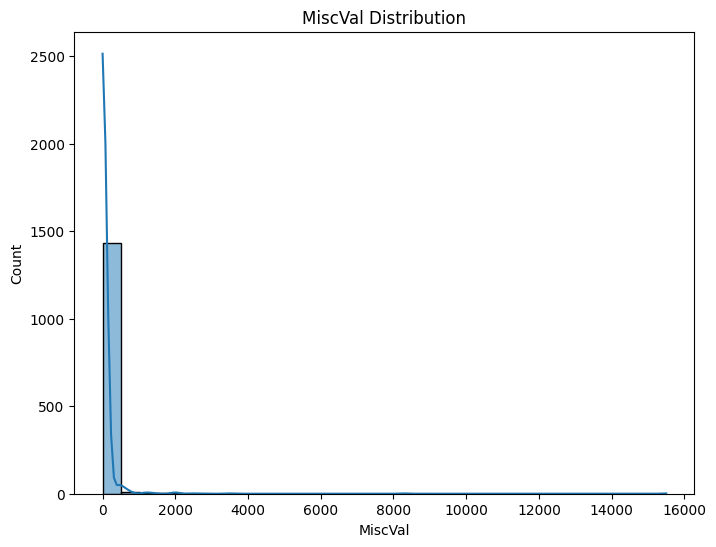

In [38]:
for col in numerical_count:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

### **Fill null values**

In [39]:
df.fillna(df[numerical_count].median(), inplace=True)

In [40]:
df[numerical_count].isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
GarageYrBlt      0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MiscVal          0
dtype: int64

### **Outliar**

In [41]:
# Function to calculate outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Check outliers in each numerical column
for col in df[numerical_count]:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

MSSubClass: 103 outliers
LotFrontage: 106 outliers
LotArea: 69 outliers
YearBuilt: 7 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
GarageYrBlt: 1 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
MiscVal: 52 outliers
MiscVal: 52 outliers


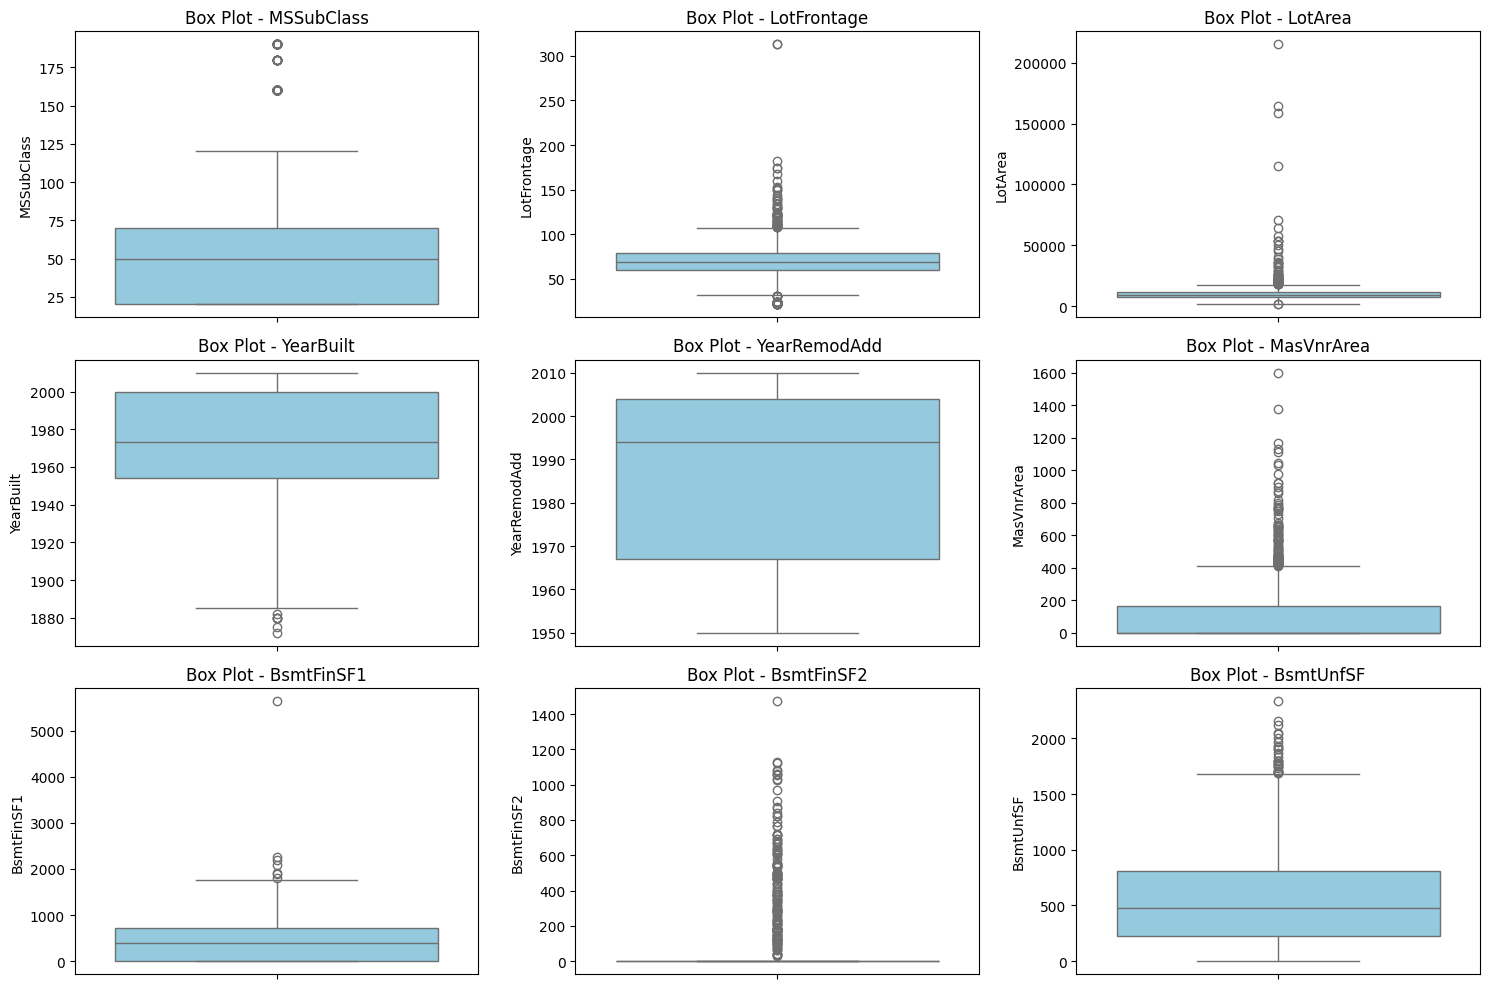

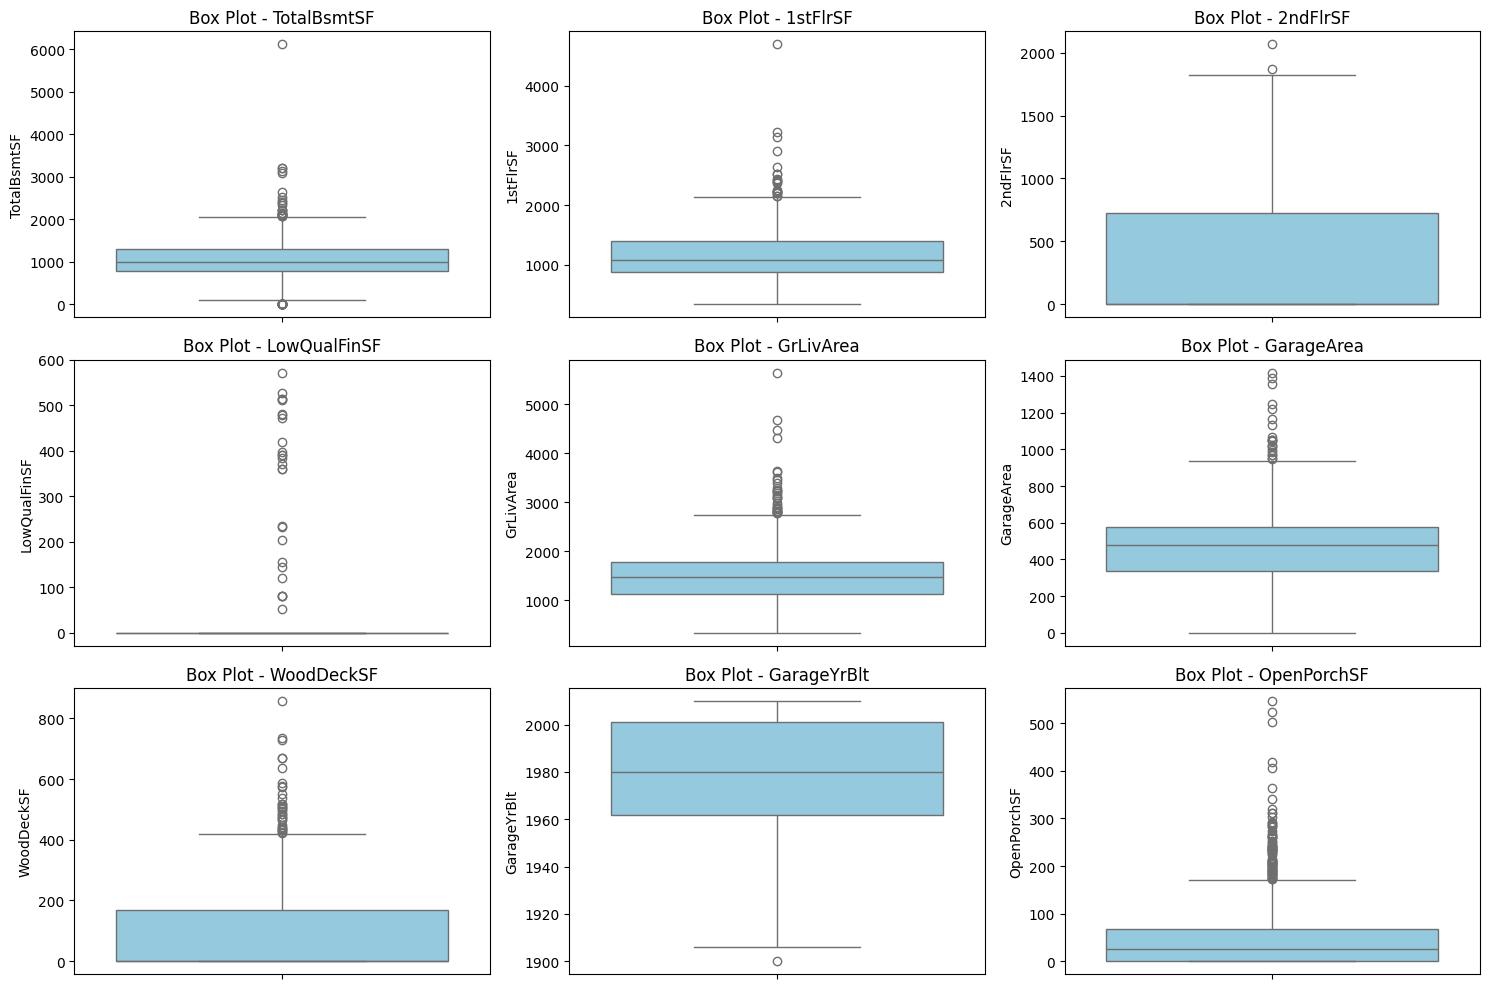

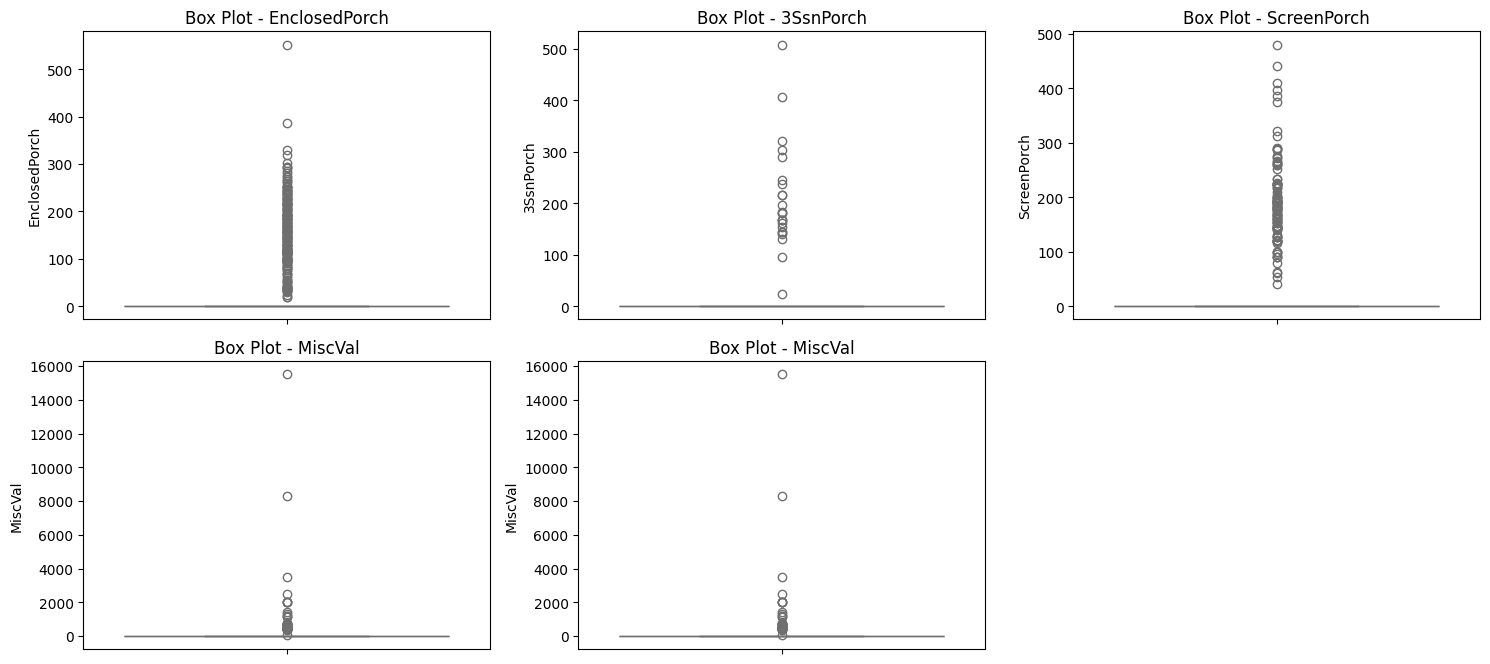

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [42]:
# Iterate through columns in chunks of 9 to create multiple plots
for i in range(0, len(df[numerical_count]), 9):
    plt.figure(figsize=(15, 10))
    for j, col in enumerate(df[numerical_count[i:i+9]], 1):
        plt.subplot(3, 3, j)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Box Plot - {col}')
    plt.tight_layout()
    plt.show()

In [43]:
def cap_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = np.where(data[feature] < lower_bound, lower_bound,
                     np.where(data[feature] > upper_bound, upper_bound, data[feature]))
    return data

# Apply capping to all numeric features (except target)
for col in df[numerical_count]:
    df = cap_outliers_iqr(df, col)

In [44]:
# Check outliers in each numerical column
for col in df[numerical_count]:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

MSSubClass: 0 outliers
LotFrontage: 0 outliers
LotArea: 0 outliers
YearBuilt: 0 outliers
YearRemodAdd: 0 outliers
MasVnrArea: 0 outliers
BsmtFinSF1: 0 outliers
BsmtFinSF2: 0 outliers
BsmtUnfSF: 0 outliers
TotalBsmtSF: 0 outliers
1stFlrSF: 0 outliers
2ndFlrSF: 0 outliers
LowQualFinSF: 0 outliers
GrLivArea: 0 outliers
GarageArea: 0 outliers
WoodDeckSF: 0 outliers
GarageYrBlt: 0 outliers
OpenPorchSF: 0 outliers
EnclosedPorch: 0 outliers
3SsnPorch: 0 outliers
ScreenPorch: 0 outliers
MiscVal: 0 outliers
MiscVal: 0 outliers


In [45]:
df[numerical_count].describe().T

count         mean          std     min      25%     50%  \
MSSubClass     1460.0    55.085616    37.508183    20.0    20.00    50.0   
LotFrontage    1460.0    69.090411    17.231909    31.5    60.00    69.0   
LotArea        1460.0  9647.388014  3594.356399  1481.5  7553.50  9478.5   
YearBuilt      1460.0  1971.299315    30.108397  1885.0  1954.00  1973.0   
YearRemodAdd   1460.0  1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1460.0    89.406336   134.017553     0.0     0.00     0.0   
BsmtFinSF1     1460.0   439.997517   433.219435     0.0     0.00   383.5   
BsmtFinSF2     1460.0     0.000000     0.000000     0.0     0.00     0.0   
BsmtUnfSF      1460.0   563.777740   431.710214     0.0   223.00   477.5   
TotalBsmtSF    1460.0  1050.254795   397.937878    42.0   795.75   991.5   
1stFlrSF       1460.0  1157.018151   362.583002   334.0   882.00  1087.0   
2ndFlrSF       1460.0   346.789041   435.791621     0.0     0.00     0.0   
LowQualFinSF   1460.0     0.000000     0.000000     0.0     0.00     0.0   
GrLivArea      1460.0  1503.735873   481.375641   334.0  1129.50  1464.0   
GarageArea     1460.0   470.670719   207.105729     0.0   334.50   480.0   
WoodDeckSF     1460.0    91.806849   116.658120     0.0     0.00     0.0   
GarageYrBlt    1460.0  1978.591438    23.989339  1903.5  1962.00  1980.0   
OpenPorchSF    1460.0    42.603425    52.501584     0.0     0.00    25.0   
EnclosedPorch  1460.0     0.000000     0.000000     0.0     0.00     0.0   
3SsnPorch      1460.0     0.000000     0.000000     0.0     0.00     0.0   
ScreenPorch    1460.0     0.000000     0.000000     0.0     0.00     0.0   
MiscVal        1460.0     0.000000     0.000000     0.0     0.00     0.0   
MiscVal        1460.0     0.000000     0.000000     0.0     0.00     0.0   

                    75%        max  
MSSubClass        70.00    145.000  
LotFrontage       79.00    107.500  
LotArea        11601.50  17673.500  
YearBuilt       2000.00   2010.000  
YearRemodAdd    2004.00   2010.000  
MasVnrArea       164.25    410.625  
BsmtFinSF1       712.25   1780.625  
BsmtFinSF2         0.00      0.000  
BsmtUnfSF        808.00   1685.500  
TotalBsmtSF     1298.25   2052.000  
1stFlrSF        1391.25   2155.125  
2ndFlrSF         728.00   1820.000  
LowQualFinSF       0.00      0.000  
GrLivArea       1776.75   2747.625  
GarageArea       576.00    938.250  
WoodDeckSF       168.00    420.000  
GarageYrBlt     2001.00   2010.000  
OpenPorchSF       68.00    170.000  
EnclosedPorch      0.00      0.000  
3SsnPorch          0.00      0.000  
ScreenPorch        0.00      0.000  
MiscVal            0.00      0.000  
MiscVal            0.00      0.000

In [49]:
df[numerical_count].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'GarageYrBlt', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MiscVal'],
      dtype='object')

In [50]:
# df[numerical_count].drop(columns=['EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MiscVal','LowQualFinSF','BsmtFinSF2'], inplace=True)
df.drop(columns=['EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MiscVal','LowQualFinSF','BsmtFinSF2'], inplace=True)

In [52]:
numerical_count = ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'GarageYrBlt', 'OpenPorchSF']

In [53]:
df[numerical_count].describe().T

count         mean          std     min      25%     50%  \
MSSubClass    1460.0    55.085616    37.508183    20.0    20.00    50.0   
LotFrontage   1460.0    69.090411    17.231909    31.5    60.00    69.0   
LotArea       1460.0  9647.388014  3594.356399  1481.5  7553.50  9478.5   
YearBuilt     1460.0  1971.299315    30.108397  1885.0  1954.00  1973.0   
YearRemodAdd  1460.0  1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea    1460.0    89.406336   134.017553     0.0     0.00     0.0   
BsmtFinSF1    1460.0   439.997517   433.219435     0.0     0.00   383.5   
BsmtUnfSF     1460.0   563.777740   431.710214     0.0   223.00   477.5   
TotalBsmtSF   1460.0  1050.254795   397.937878    42.0   795.75   991.5   
1stFlrSF      1460.0  1157.018151   362.583002   334.0   882.00  1087.0   
2ndFlrSF      1460.0   346.789041   435.791621     0.0     0.00     0.0   
GrLivArea     1460.0  1503.735873   481.375641   334.0  1129.50  1464.0   
GarageArea    1460.0   470.670719   207.105729     0.0   334.50   480.0   
WoodDeckSF    1460.0    91.806849   116.658120     0.0     0.00     0.0   
GarageYrBlt   1460.0  1978.591438    23.989339  1903.5  1962.00  1980.0   
OpenPorchSF   1460.0    42.603425    52.501584     0.0     0.00    25.0   

                   75%        max  
MSSubClass       70.00    145.000  
LotFrontage      79.00    107.500  
LotArea       11601.50  17673.500  
YearBuilt      2000.00   2010.000  
YearRemodAdd   2004.00   2010.000  
MasVnrArea      164.25    410.625  
BsmtFinSF1      712.25   1780.625  
BsmtUnfSF       808.00   1685.500  
TotalBsmtSF    1298.25   2052.000  
1stFlrSF       1391.25   2155.125  
2ndFlrSF        728.00   1820.000  
GrLivArea      1776.75   2747.625  
GarageArea      576.00    938.250  
WoodDeckSF      168.00    420.000  
GarageYrBlt    2001.00   2010.000  
OpenPorchSF      68.00    170.000

In [51]:
# df[numerical_count].describe().T
df.describe().T

count           mean           std      min        25%  \
MSSubClass    1460.0      55.085616     37.508183     20.0      20.00   
LotFrontage   1460.0      69.090411     17.231909     31.5      60.00   
LotArea       1460.0    9647.388014   3594.356399   1481.5    7553.50   
OverallQual   1460.0       6.099315      1.382997      1.0       5.00   
OverallCond   1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt     1460.0    1971.299315     30.108397   1885.0    1954.00   
YearRemodAdd  1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea    1460.0      89.406336    134.017553      0.0       0.00   
BsmtFinSF1    1460.0     439.997517    433.219435      0.0       0.00   
BsmtUnfSF     1460.0     563.777740    431.710214      0.0     223.00   
TotalBsmtSF   1460.0    1050.254795    397.937878     42.0     795.75   
1stFlrSF      1460.0    1157.018151    362.583002    334.0     882.00   
2ndFlrSF      1460.0     346.789041    435.791621      0.0       0.00   
GrLivArea     1460.0    1503.735873    481.375641    334.0    1129.50   
BsmtFullBath  1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath  1460.0       0.057534      0.238753      0.0       0.00   
FullBath      1460.0       1.565068      0.550916      0.0       1.00   
HalfBath      1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr  1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr  1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd  1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces    1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt   1460.0    1978.591438     23.989339   1903.5    1962.00   
GarageCars    1460.0       1.767123      0.747315      0.0       1.00   
GarageArea    1460.0     470.670719    207.105729      0.0     334.50   
WoodDeckSF    1460.0      91.806849    116.658120      0.0       0.00   
OpenPorchSF   1460.0      42.603425     52.501584      0.0       0.00   
PoolArea      1460.0       2.758904     40.177307      0.0       0.00   
MoSold        1460.0       6.321918      2.703626      1.0       5.00   
YrSold        1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice     1460.0  180921.195890  79442.502883  34900.0  129975.00   

                   50%        75%         max  
MSSubClass        50.0      70.00     145.000  
LotFrontage       69.0      79.00     107.500  
LotArea         9478.5   11601.50   17673.500  
OverallQual        6.0       7.00      10.000  
OverallCond        5.0       6.00       9.000  
YearBuilt       1973.0    2000.00    2010.000  
YearRemodAdd    1994.0    2004.00    2010.000  
MasVnrArea         0.0     164.25     410.625  
BsmtFinSF1       383.5     712.25    1780.625  
BsmtUnfSF        477.5     808.00    1685.500  
TotalBsmtSF      991.5    1298.25    2052.000  
1stFlrSF        1087.0    1391.25    2155.125  
2ndFlrSF           0.0     728.00    1820.000  
GrLivArea       1464.0    1776.75    2747.625  
BsmtFullBath       0.0       1.00       3.000  
BsmtHalfBath       0.0       0.00       2.000  
FullBath           2.0       2.00       3.000  
HalfBath           0.0       1.00       2.000  
BedroomAbvGr       3.0       3.00       8.000  
KitchenAbvGr       1.0       1.00       3.000  
TotRmsAbvGrd       6.0       7.00      14.000  
Fireplaces         1.0       1.00       3.000  
GarageYrBlt     1980.0    2001.00    2010.000  
GarageCars         2.0       2.00       4.000  
GarageArea       480.0     576.00     938.250  
WoodDeckSF         0.0     168.00     420.000  
OpenPorchSF       25.0      68.00     170.000  
PoolArea           0.0       0.00     738.000  
MoSold             6.0       8.00      12.000  
YrSold          2008.0    2009.00    2010.000  
SalePrice     163000.0  214000.00  755000.000

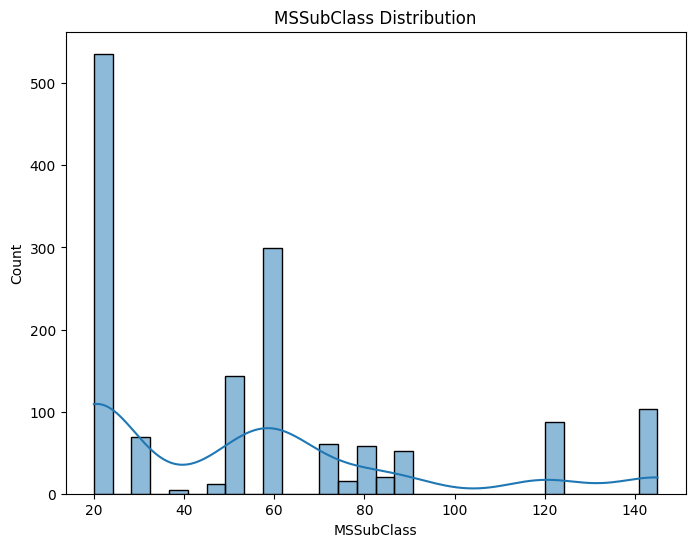

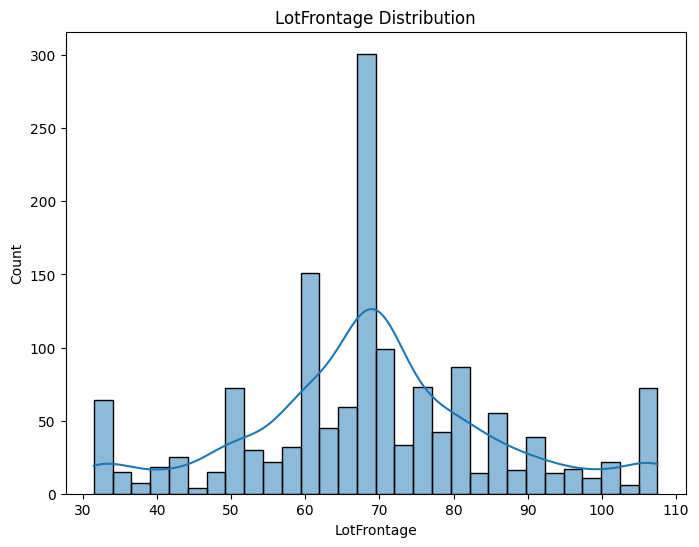

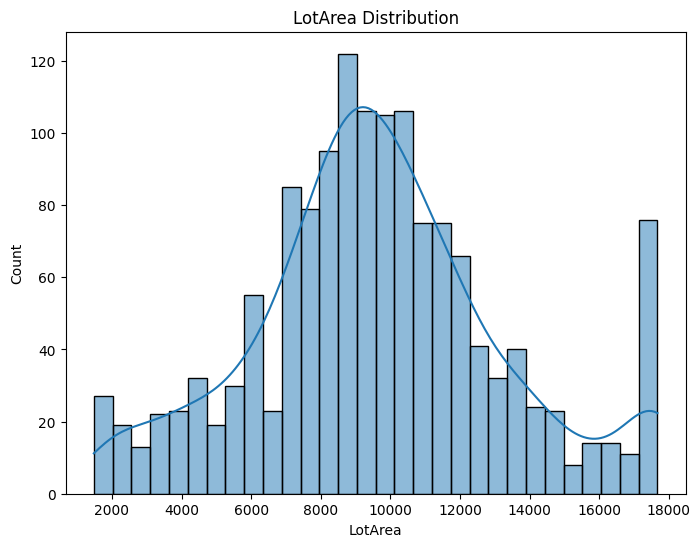

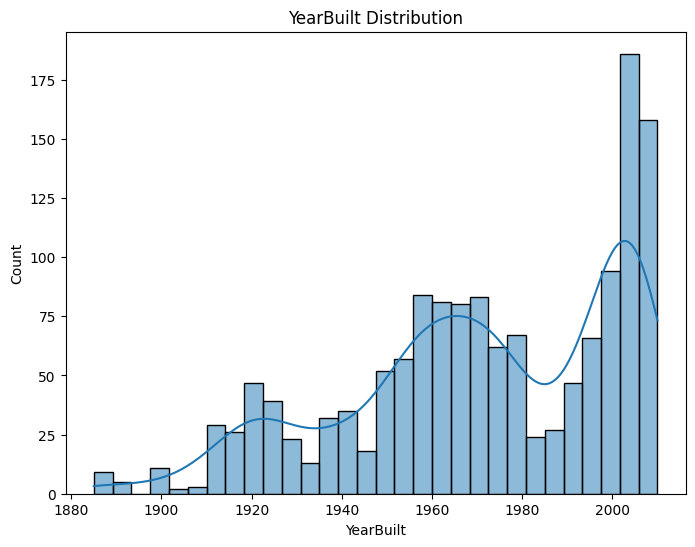

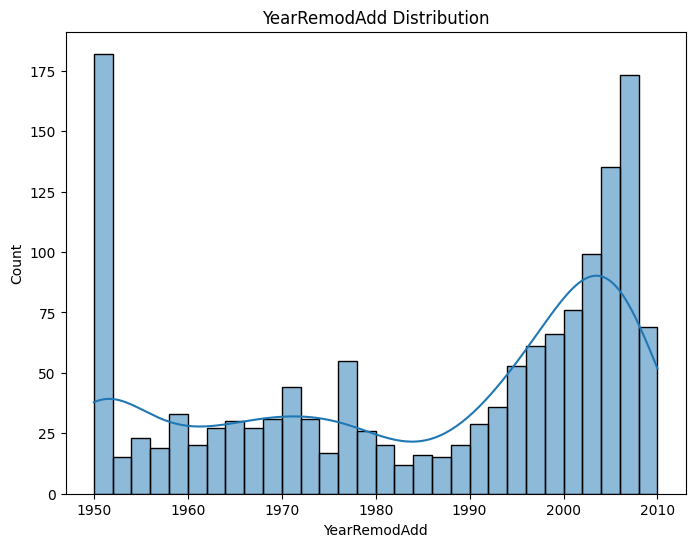

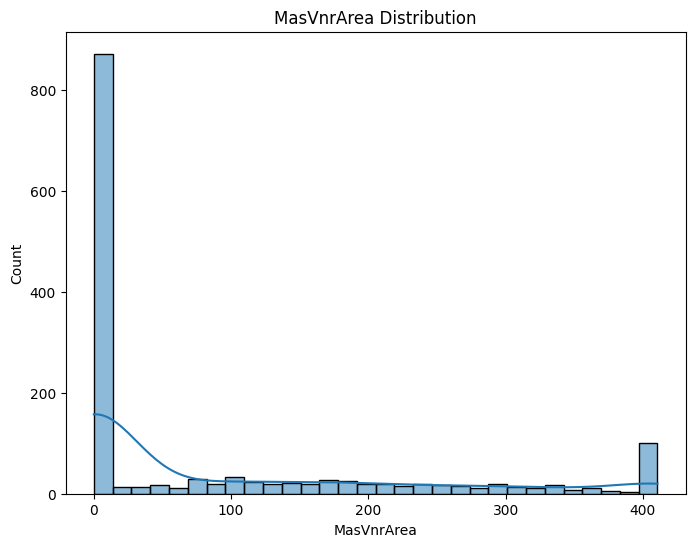

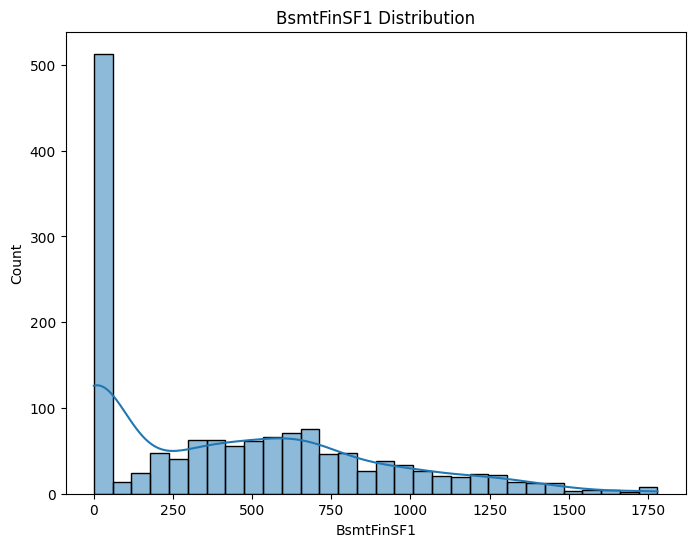

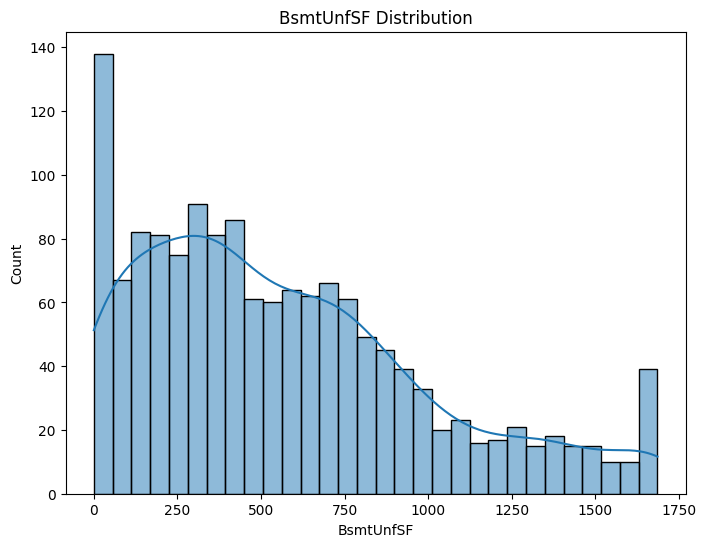

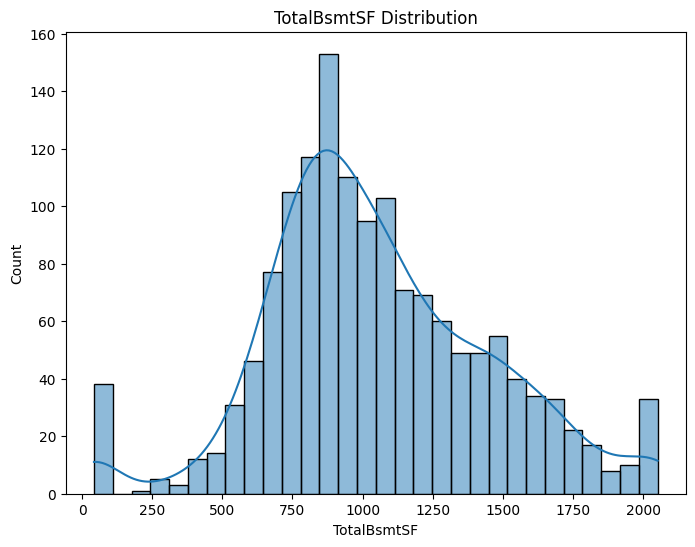

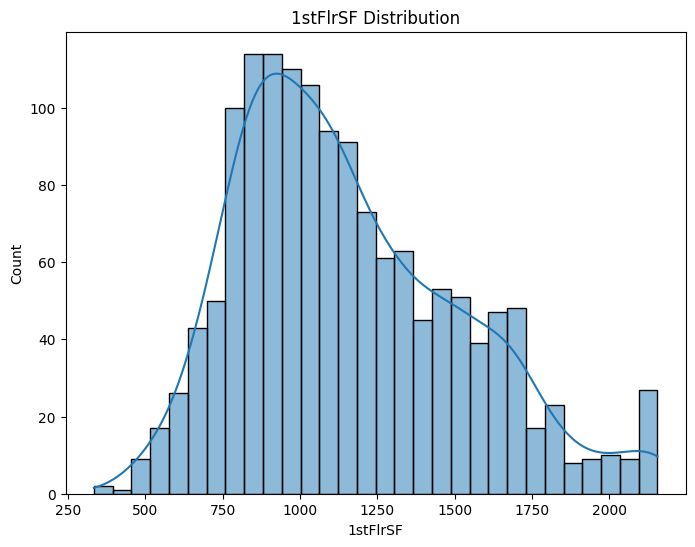

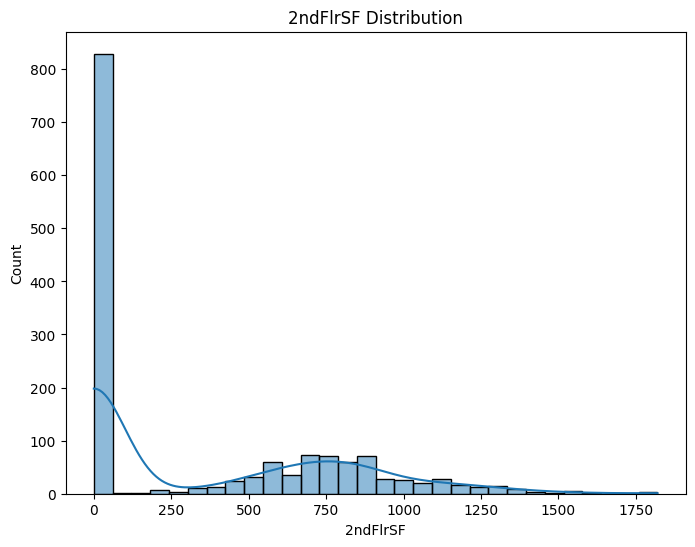

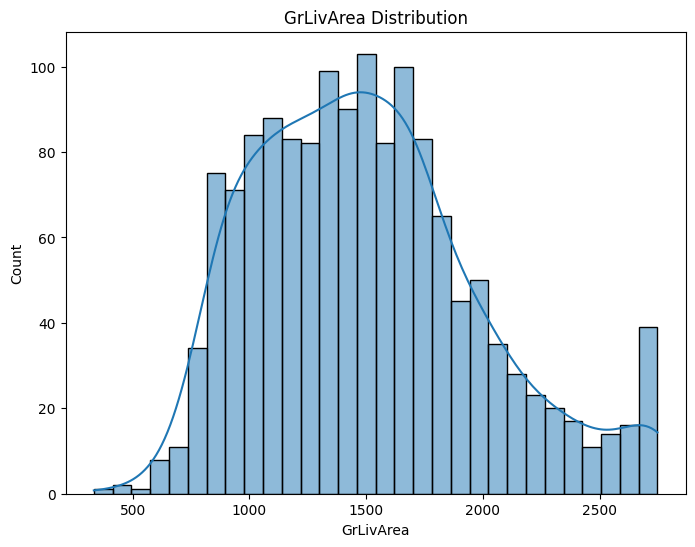

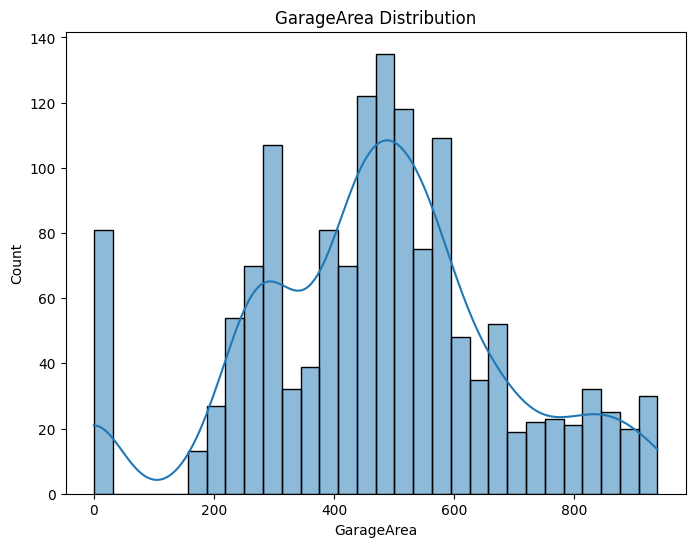

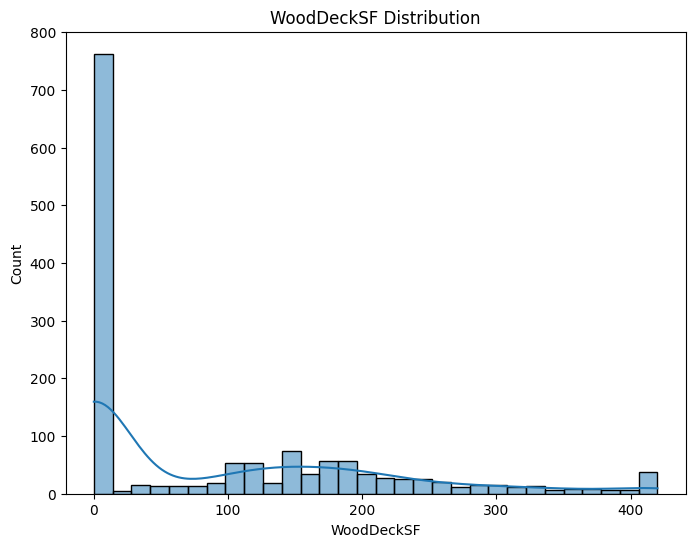

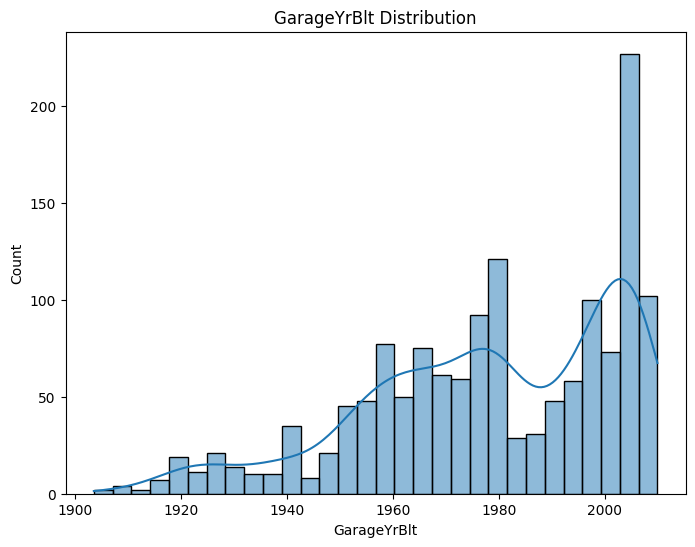

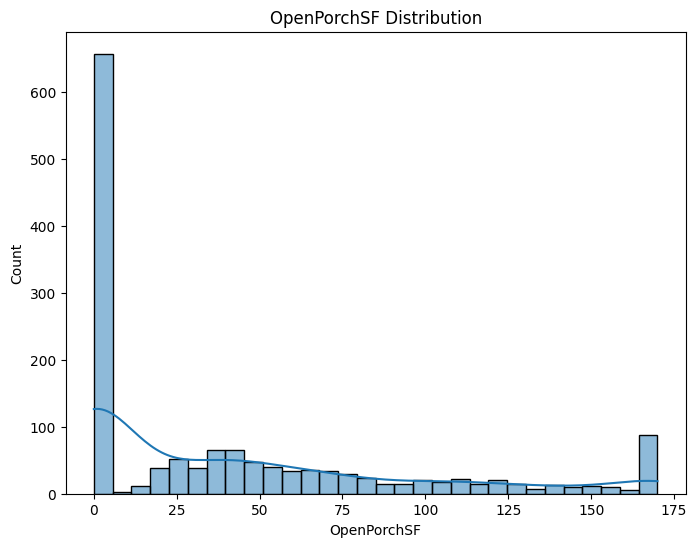

In [54]:
for col in numerical_count:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

### Scaling

## **Numerical_Categorical_Cols**

In [55]:
df[num_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   OverallCond   1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   KitchenAbvGr  1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   Fireplaces    1460 non-null   int64
 10  GarageCars    1460 non-null   int64
 11  PoolArea      1460 non-null   int64
 12  MoSold        1460 non-null   int64
 13  YrSold        1460 non-null   int64
dtypes: int64(14)
memory usage: 159.8 KB


In [56]:
df[num_cat].describe().T

count         mean        std     min     25%     50%     75%  \
OverallQual   1460.0     6.099315   1.382997     1.0     5.0     6.0     7.0   
OverallCond   1460.0     5.575342   1.112799     1.0     5.0     5.0     6.0   
BsmtFullBath  1460.0     0.425342   0.518911     0.0     0.0     0.0     1.0   
BsmtHalfBath  1460.0     0.057534   0.238753     0.0     0.0     0.0     0.0   
FullBath      1460.0     1.565068   0.550916     0.0     1.0     2.0     2.0   
HalfBath      1460.0     0.382877   0.502885     0.0     0.0     0.0     1.0   
BedroomAbvGr  1460.0     2.866438   0.815778     0.0     2.0     3.0     3.0   
KitchenAbvGr  1460.0     1.046575   0.220338     0.0     1.0     1.0     1.0   
TotRmsAbvGrd  1460.0     6.517808   1.625393     2.0     5.0     6.0     7.0   
Fireplaces    1460.0     0.613014   0.644666     0.0     0.0     1.0     1.0   
GarageCars    1460.0     1.767123   0.747315     0.0     1.0     2.0     2.0   
PoolArea      1460.0     2.758904  40.177307     0.0     0.0     0.0     0.0   
MoSold        1460.0     6.321918   2.703626     1.0     5.0     6.0     8.0   
YrSold        1460.0  2007.815753   1.328095  2006.0  2007.0  2008.0  2009.0   

                 max  
OverallQual     10.0  
OverallCond      9.0  
BsmtFullBath     3.0  
BsmtHalfBath     2.0  
FullBath         3.0  
HalfBath         2.0  
BedroomAbvGr     8.0  
KitchenAbvGr     3.0  
TotRmsAbvGrd    14.0  
Fireplaces       3.0  
GarageCars       4.0  
PoolArea       738.0  
MoSold          12.0  
YrSold        2010.0

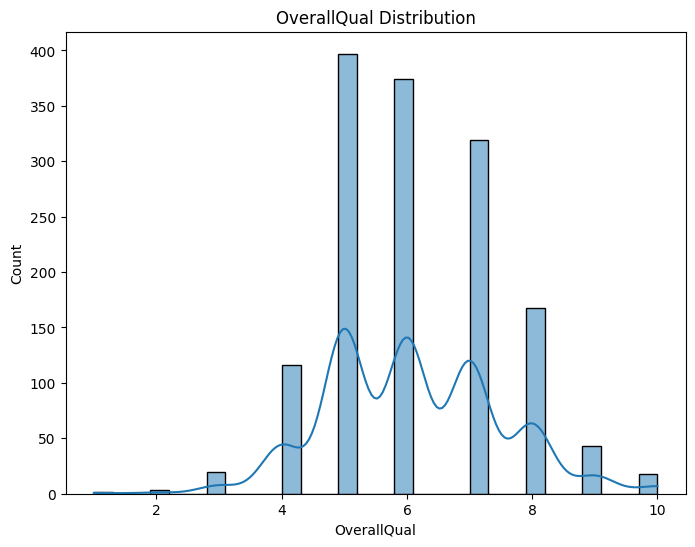

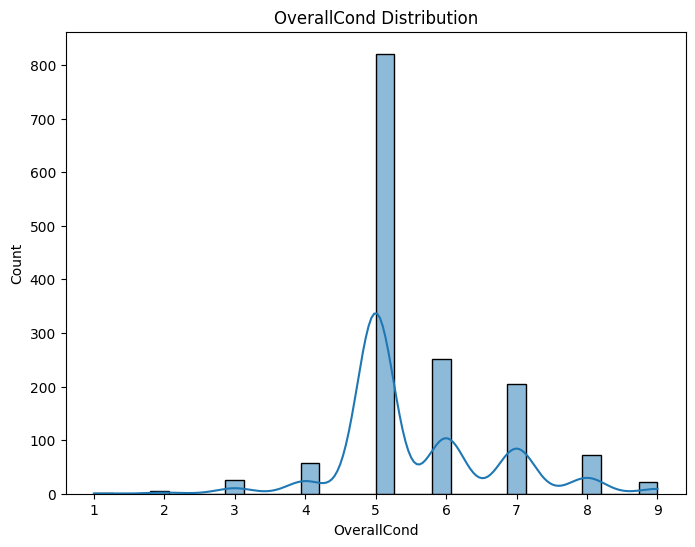

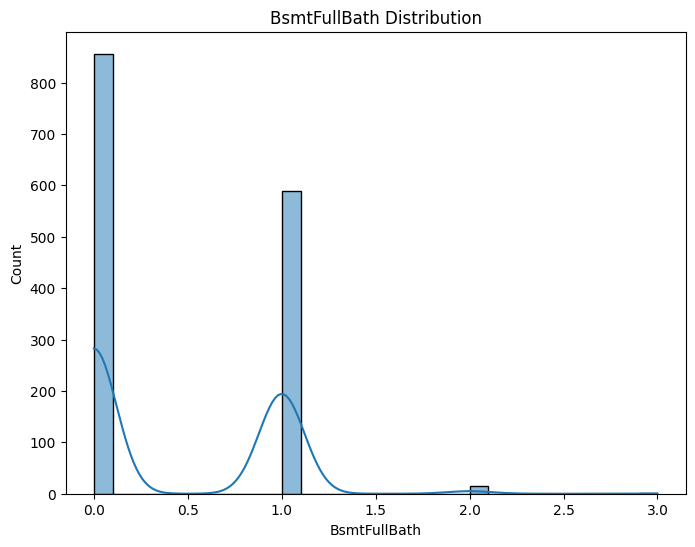

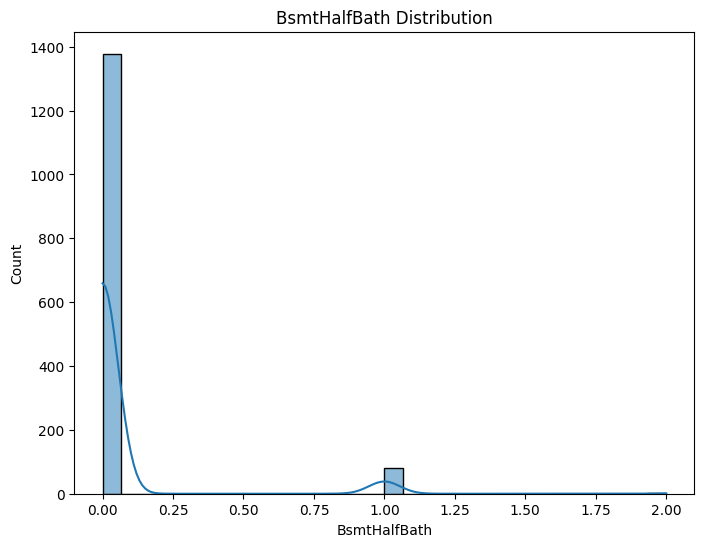

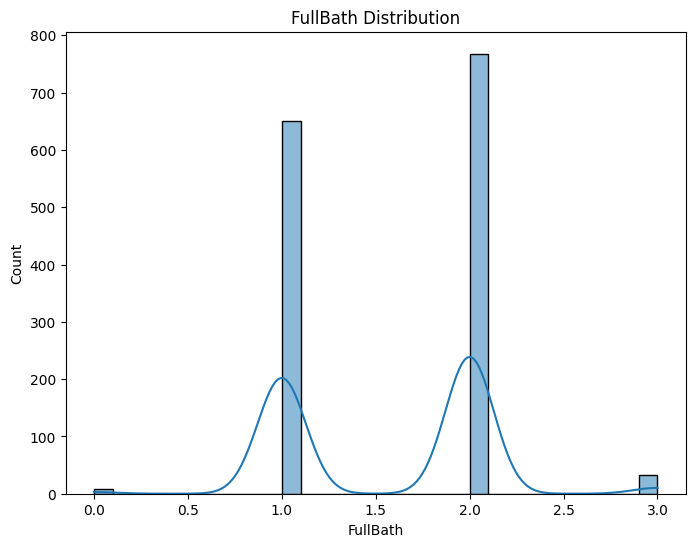

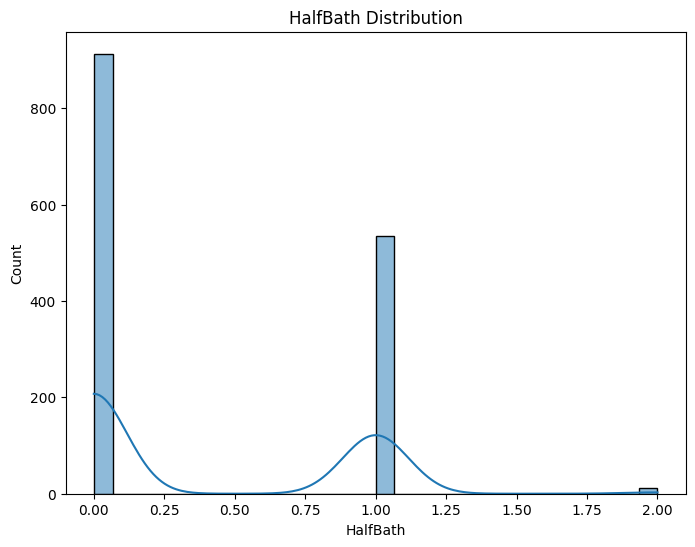

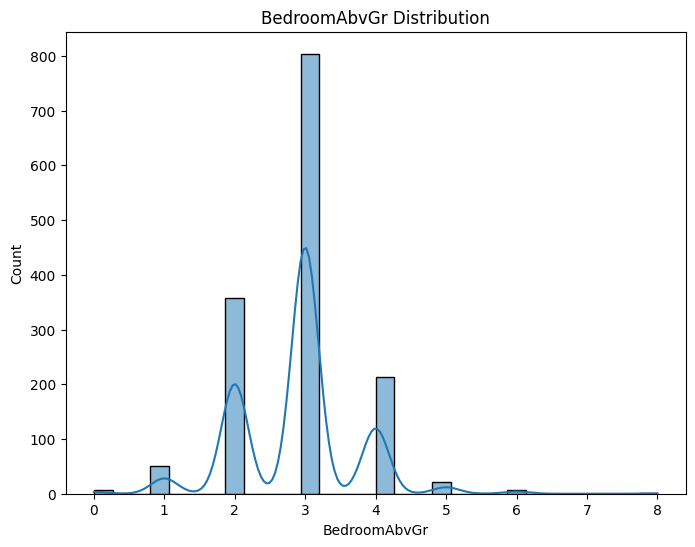

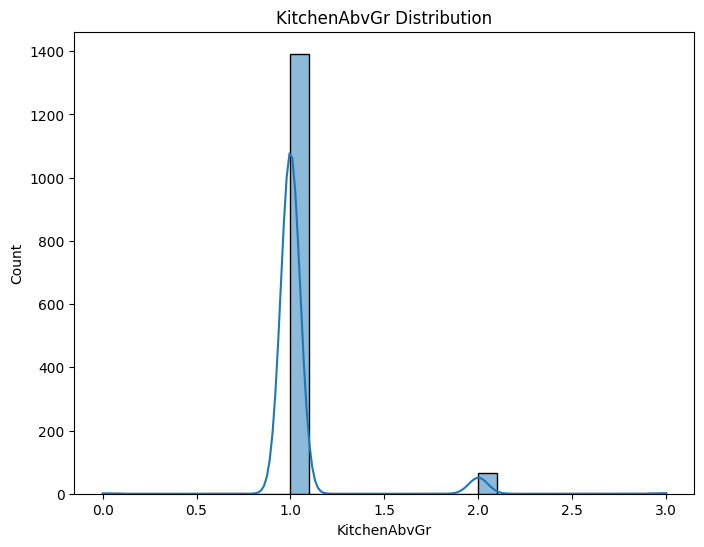

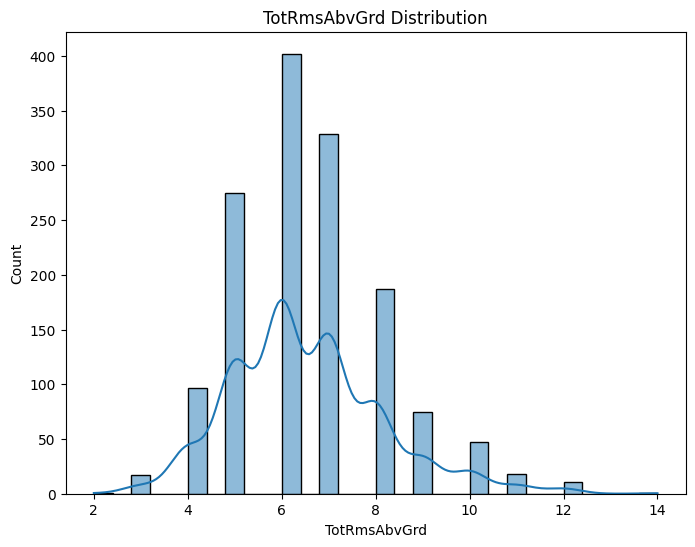

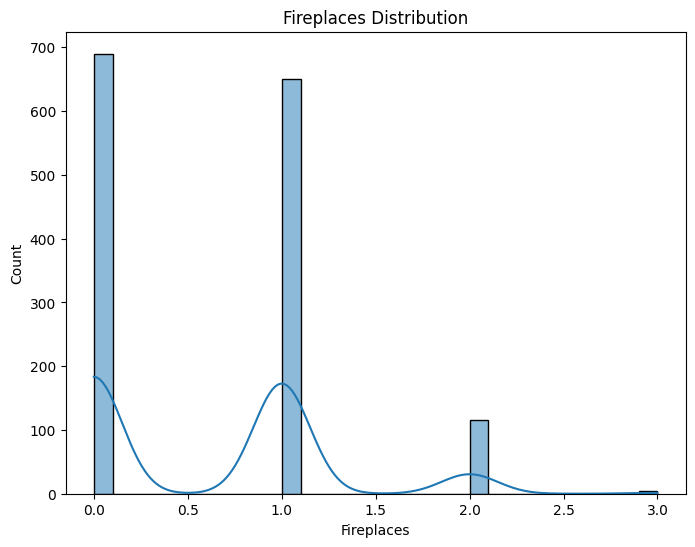

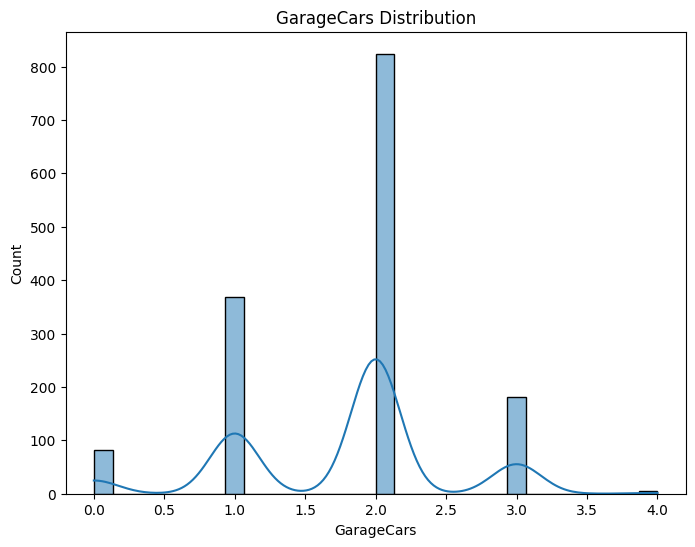

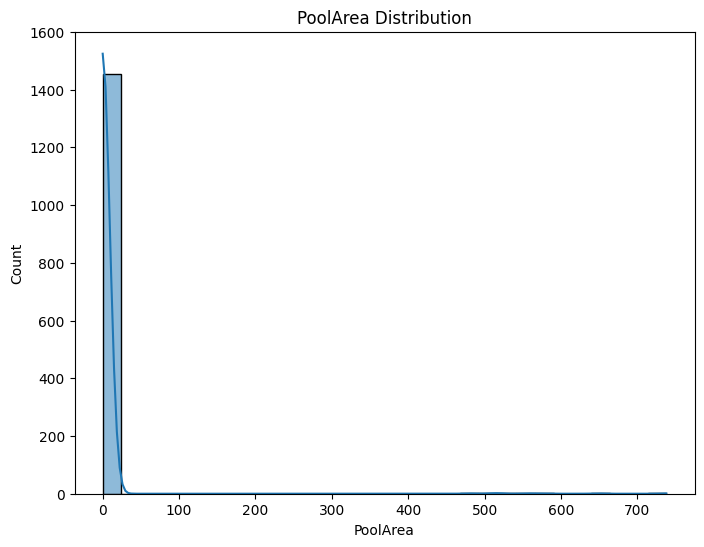

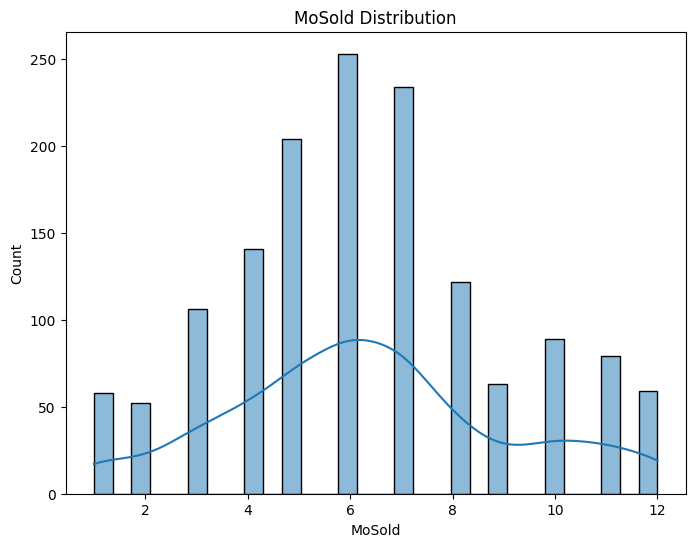

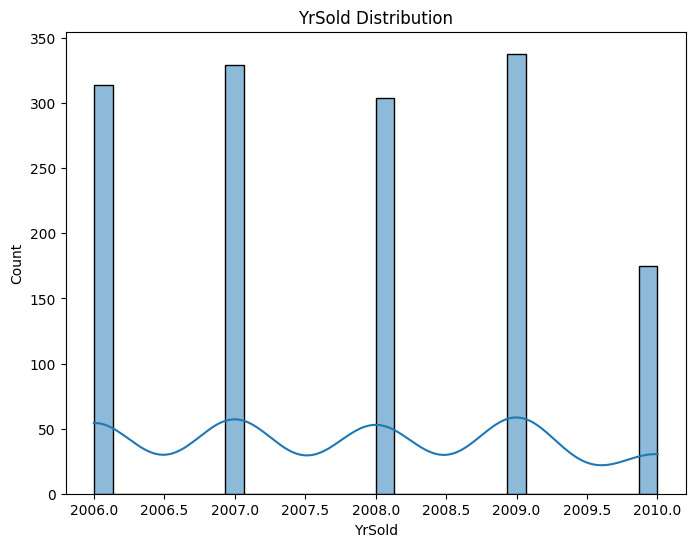

In [57]:
for col in numerical_cate:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

## **Categorical_Columns**

In [58]:
df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [59]:
df.fillna(df[categorical_cols].mode().iloc[0], inplace=True)

In [61]:
df[categorical_cols].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 37 columns]

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

display(df[categorical_cols].head())

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0             5           2           2  ...           4            2   
1            24           1           2  ...           4            3   
2             5           2           2  ...           4            2   
3             6           2           2  ...           4            2   
4            15           2           2  ...           4            2   

   Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0           6           1             1           4           4           2   
1           6           1             1           4           4           2   
2           6           1             1           4           4           2   
3           6           5             2           4           4           2   
4           6           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 37 columns]

# df After All Preprocessing

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [65]:
df.describe().T

count           mean           std      min       25%  \
MSSubClass     1460.0      55.085616     37.508183     20.0      20.0   
MSZoning       1460.0       3.028767      0.632017      0.0       3.0   
LotFrontage    1460.0      69.090411     17.231909     31.5      60.0   
LotArea        1460.0    9647.388014   3594.356399   1481.5    7553.5   
Street         1460.0       0.995890      0.063996      0.0       1.0   
...               ...            ...           ...      ...       ...   
MoSold         1460.0       6.321918      2.703626      1.0       5.0   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.0   
SaleType       1460.0       7.513014      1.552100      0.0       8.0   
SaleCondition  1460.0       3.770548      1.100854      0.0       4.0   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.0   

                    50%       75%       max  
MSSubClass         50.0      70.0     145.0  
MSZoning            3.0       3.0       4.0  
LotFrontage        69.0      79.0     107.5  
LotArea          9478.5   11601.5   17673.5  
Street              1.0       1.0       1.0  
...                 ...       ...       ...  
MoSold              6.0       8.0      12.0  
YrSold           2008.0    2009.0    2010.0  
SaleType            8.0       8.0       8.0  
SaleCondition       4.0       4.0       5.0  
SalePrice      163000.0  214000.0  755000.0  

[68 rows x 8 columns]

## **Calcolate Corr**

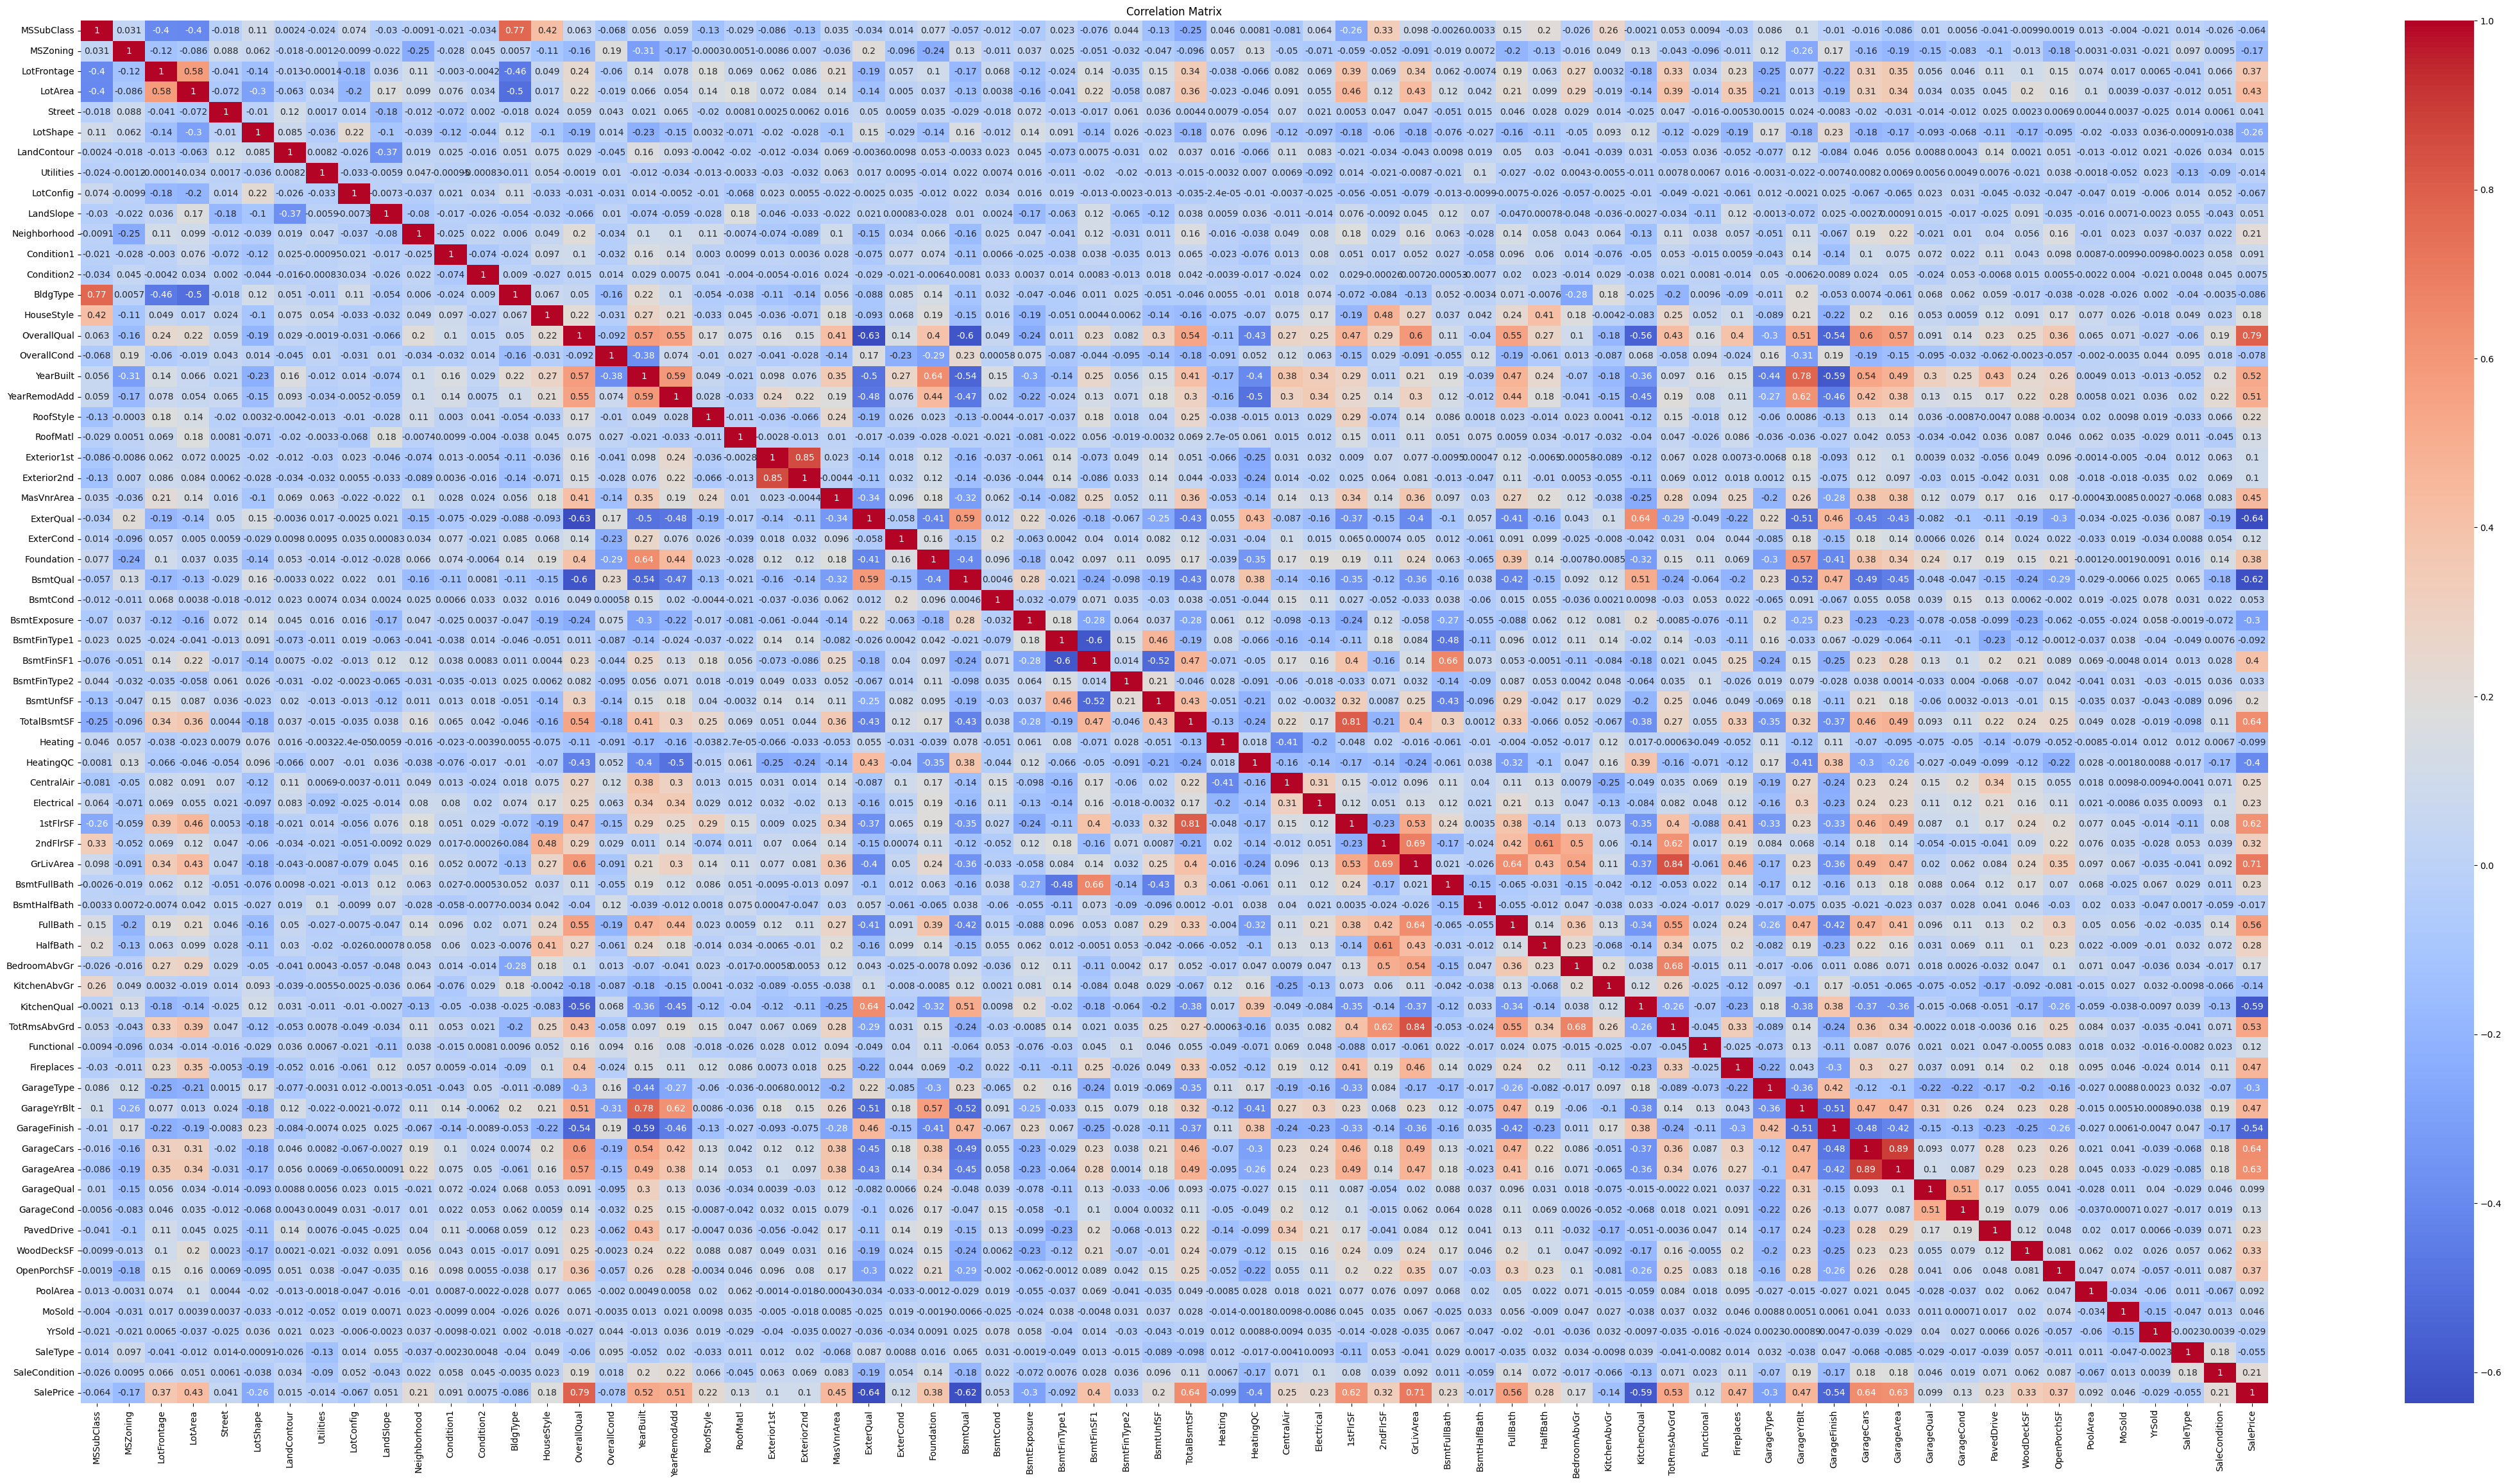

In [66]:
plt.figure(figsize=(55,28))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Simple Linear_Regression with highest correlated feature

In [67]:
x = df['OverallQual']
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train.values.reshape(-1, 1), y_train)

score = LR.score(x_test.values.reshape(-1, 1), y_test)

# Print the score
print("Linear Regression Score:", score)

Linear Regression Score: 0.6504677778896863


In [70]:
y_pred = LR.predict(x_test.values.reshape(-1, 1))
r2_score = LR.score(x_test.values.reshape(-1, 1), y_test)
print("R2 Score:", r2_score)

R2 Score: 0.6504677778896863


# **Multi Linear_Regression with highest correlated features**

## **Without Feature Selection**

In [71]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Linear_Regression_Model**

In [73]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

score = LR.score(x_test, y_test)

# Print the score
print("Linear Regression Score:", score)

y_pred = LR.predict(x_test)
r2_score = LR.score(x_test, y_test)
print("R2 Score:", r2_score)

Linear Regression Score: 0.8632899333853051
R2 Score: 0.8632899333853051


### **Lesso_Regression_Model**

In [74]:

lasso_model = Lasso(alpha=0.1, max_iter=10000) # Increased max_iter
lasso_model.fit(x_train, y_train)

score = lasso_model.score(x_test, y_test)

print("Lasso Regression Score:", score)

Lasso Regression Score: 0.8632903694771111


### **Ridge_Regression_Model**

In [75]:
Ridge_model = Ridge(alpha=0.1, max_iter=10000) # Increased max_iter
Ridge_model.fit(x_train, y_train)

score = Ridge_model.score(x_test, y_test)

print("Ridge Regression Score:", score)

Ridge Regression Score: 0.863278782313098


## **With Feature Selection**

In [77]:
correlation_matrix = df.corr()
highly_correlated_with_sale_price = []

for col in correlation_matrix.columns:
    if col != 'SalePrice':
        corr_value = correlation_matrix.loc[col, 'SalePrice']
        if corr_value > 0.20 or corr_value < -0.20:
            highly_correlated_with_sale_price.append(col)

print("Columns highly correlated with SalePrice:")
print(highly_correlated_with_sale_price)
print(len(highly_correlated_with_sale_price))

Columns highly correlated with SalePrice:
['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']
37


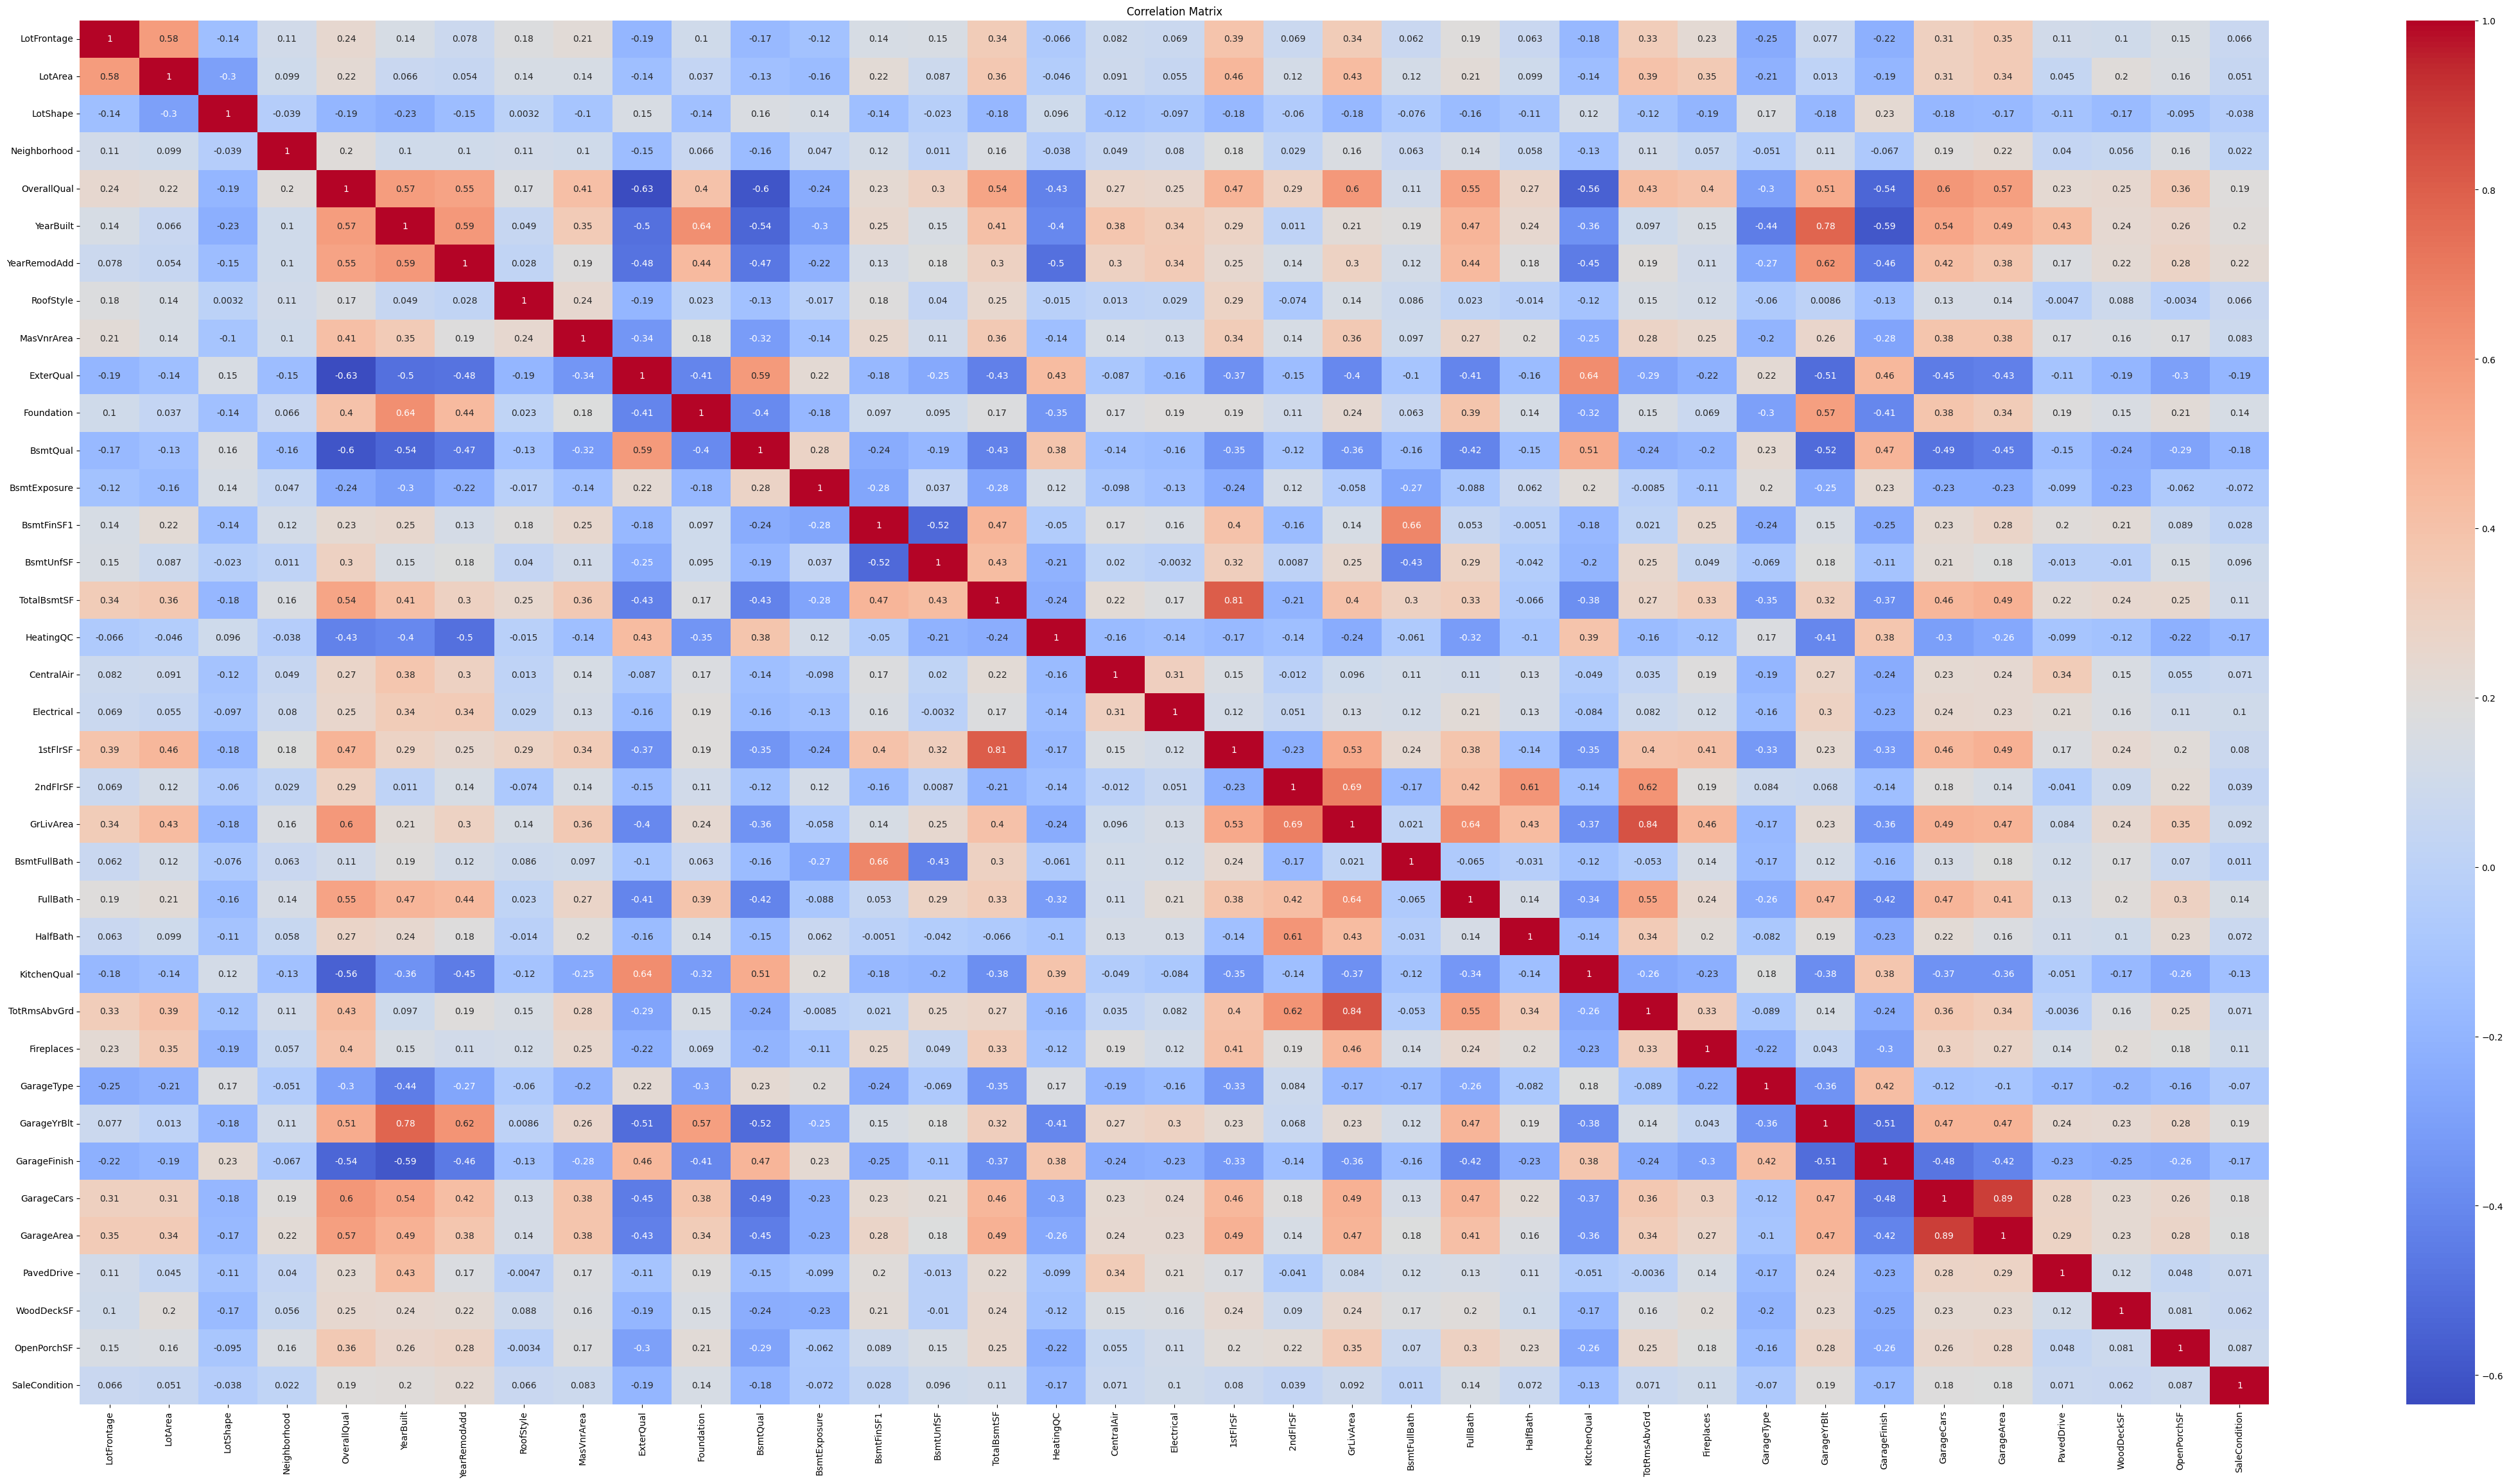

In [78]:
df_correlated = df[list(highly_correlated_with_sale_price)]

plt.figure(figsize=(55,28))
sns.heatmap(df_correlated.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [80]:
x = df_correlated
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Linear_Regression_Model**

In [81]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

score = LR.score(x_test, y_test)

# Print the score
print("Linear Regression Score:", score)

y_pred = LR.predict(x_test)
r2_score = LR.score(x_test, y_test)
print("R2 Score:", r2_score)

Linear Regression Score: 0.8607734950025854
R2 Score: 0.8607734950025854


### **Lesso_Regression_Model**

In [82]:
lasso_model = Lasso(alpha=0.1, max_iter=10000) # Increased max_iter
lasso_model.fit(x_train, y_train)

score = lasso_model.score(x_test, y_test)

print("Lasso Regression Score:", score)

Lasso Regression Score: 0.8607732594365647


### **Ridge_Regression_Model**

In [83]:
Ridge_model = Ridge(alpha=0.1, max_iter=10000) # Increased max_iter
Ridge_model.fit(x_train, y_train)

score = Ridge_model.score(x_test, y_test)

print("Ridge Regression Score:", score)

Ridge Regression Score: 0.8607741441727531


# **The Best Acc is 86.3% from LR Model Without Feature Selection**